In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing library to remove the warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
#Reading the application_data csv file
appdata =pd.read_csv("C://Users//Abhimanyu//Desktop//Banking_Data//application_data.csv")

In [5]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#checking the structure of the data
appdata.shape

(307511, 122)

In [7]:
#Checking null values in the columns
appdata.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#checking null value percentage for all 122 columns
round(100*(appdata.isnull().sum()/len(appdata.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [9]:
#checking column names having null value percentage more than 40
emptycolumn=appdata.isnull().sum()/len(appdata)*100
emptycolumn=emptycolumn[emptycolumn.values>=40]
emptycolumn

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [10]:
#droping the columns having higher null percentage
emptycolumn = list(emptycolumn[emptycolumn.values>=0.4].index)
appdata.drop(labels = emptycolumn,axis = 1,inplace = True)

In [11]:
#checking columns with less null values
appdata.isnull().sum()/len(appdata)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [12]:
appdata.shape

(307511, 73)

#### Dropping unwanted columns

In [13]:
appdata.drop(['EXT_SOURCE_3','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21'],axis=1,inplace=True)

## Missing Values Suggestions

In [14]:
appdata.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [15]:
appdata['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### Suggestion
Can Replace NA with 0 i.e Median of appdata.AMT_REQ_CREDIT_BUREAU_HOUR

In [16]:
appdata.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [17]:
appdata['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['AMT_REQ_CREDIT_BUREAU_DAY']

In [18]:
appdata.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [19]:
appdata['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['AMT_REQ_CREDIT_BUREAU_WEEK']

In [20]:
appdata.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [21]:
appdata['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['AMT_REQ_CREDIT_BUREAU_MON']

In [22]:
appdata.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [23]:
appdata['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['AMT_REQ_CREDIT_BUREAU_QRT']

In [24]:
appdata.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

In [25]:
appdata['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['AMT_REQ_CREDIT_BUREAU_YEAR']

In [26]:
appdata.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [27]:
appdata['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['OBS_30_CNT_SOCIAL_CIRCLE']

In [28]:
appdata.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [29]:
appdata['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['DEF_30_CNT_SOCIAL_CIRCLE']

In [30]:
appdata.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [31]:
appdata['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['OBS_60_CNT_SOCIAL_CIRCLE']

In [32]:
appdata.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [33]:
appdata['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Suggestion :
Can be replace the NA with 0 i.e Median value of appdata['DEF_60_CNT_SOCIAL_CIRCLE']

In [34]:
appdata.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [35]:
appdata['AMT_ANNUITY'].isnull().sum()

12

In [36]:
appdata['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

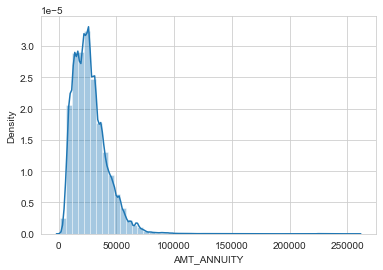

In [37]:
sns.set_style('whitegrid') 
sns.distplot(appdata['AMT_ANNUITY']) 
plt.show()

#### Suggestion
We can Fill NA with 0 i.e. Mean for this field as most of the values are spread between 0 to 50000

In [38]:
appdata['AMT_GOODS_PRICE'].isnull().sum()

278

In [39]:
appdata['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

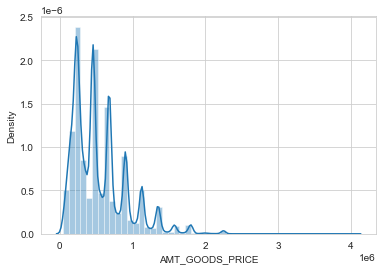

In [40]:
sns.set_style('whitegrid') 
sns.distplot(appdata['AMT_GOODS_PRICE']) 
plt.show()

#### Suggestion
We can Fill NA with 0 i.e. Mean for this field as it's right skewed graph

In [41]:
appdata['NAME_TYPE_SUITE'].isnull().sum()

1292

In [42]:
appdata['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Suggestion
We can Fill NA with "Unaccompanied" i.e. Mode for this field

In [43]:
appdata['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [44]:
appdata['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

#### Suggestion
We can Fill NA with 0 as this will be considered as Client has not changed the Phone

#### Print the information about the attributes of application_data

In [45]:
type(appdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

NoneType

#### Converting negative values to absolute values

In [46]:
appdata['DAYS_BIRTH'] = abs(appdata['DAYS_BIRTH'])
appdata['DAYS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH'])
appdata['DAYS_ID_PUBLISH'] = abs(appdata['DAYS_ID_PUBLISH'])
appdata['DAYS_LAST_PHONE_CHANGE'] = abs(appdata['DAYS_LAST_PHONE_CHANGE'])

In [47]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
categorical_dtypes = [i for i in appdata.select_dtypes(include=np.object).columns if i not in ["type"] ]
numerical_dtypes = [i for i in appdata.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [49]:
print('Categorical Columns', "\n")
for x in range(len(categorical_dtypes)): 
    print(categorical_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [50]:
print('Numerical Columns', "\n")
for x in range(len(numerical_dtypes)): 
    print(numerical_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


In [51]:
## seggregating the numeric columns to see the outliers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = appdata.select_dtypes(include=numerics)

In [52]:
outlier_df.shape

(307511, 40)

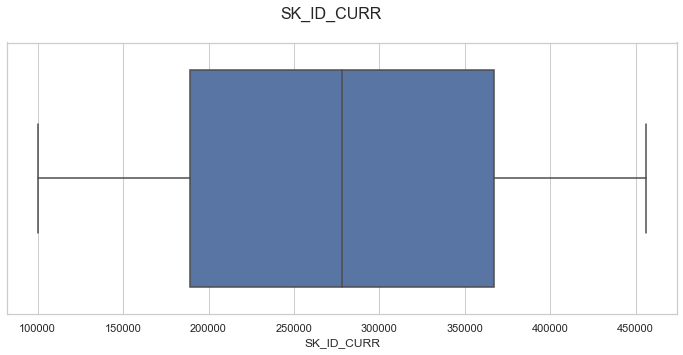

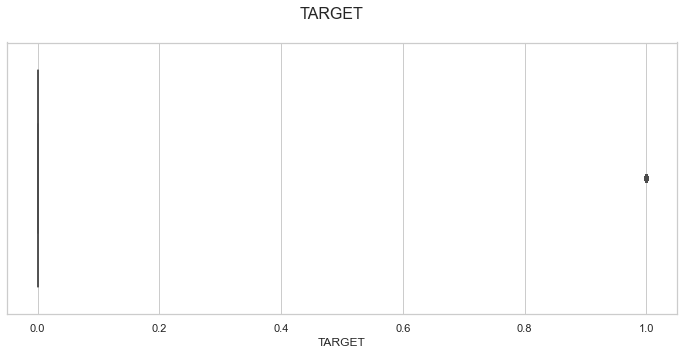

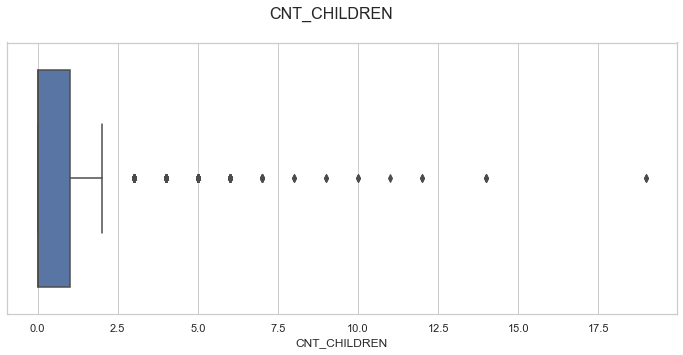

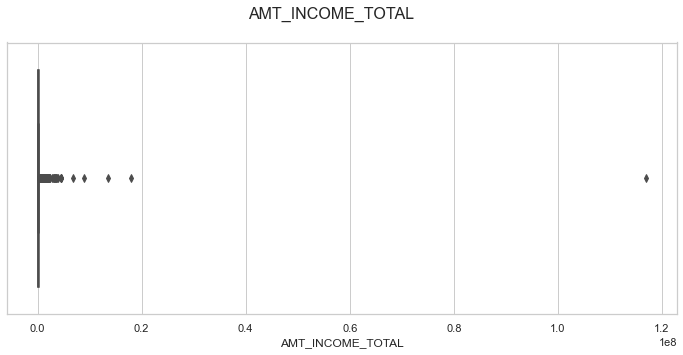

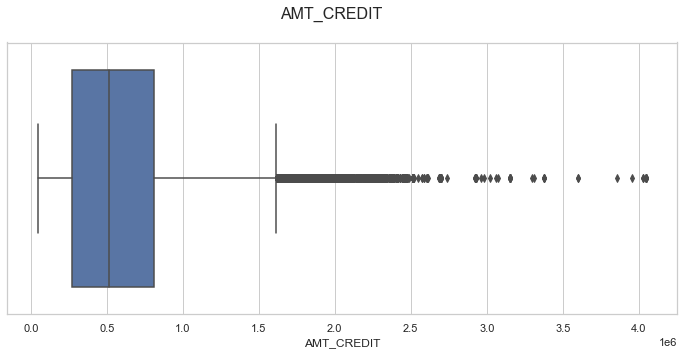

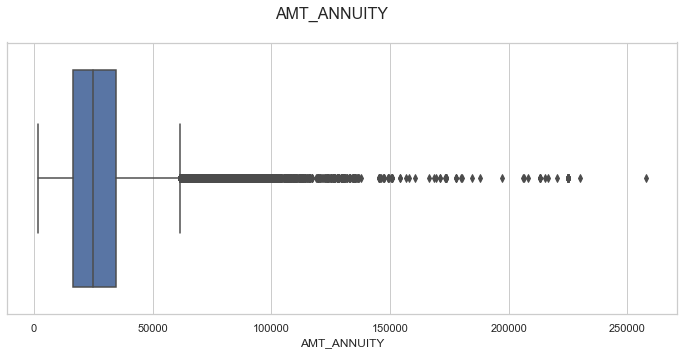

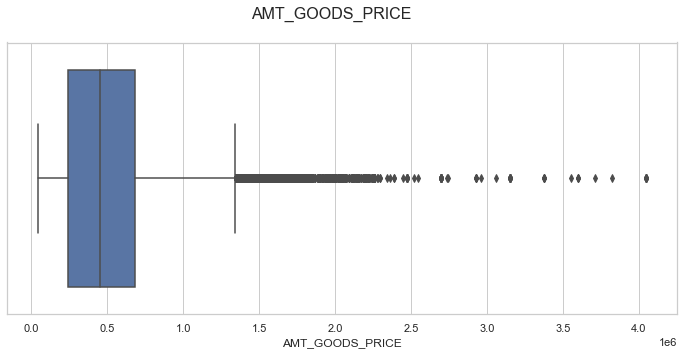

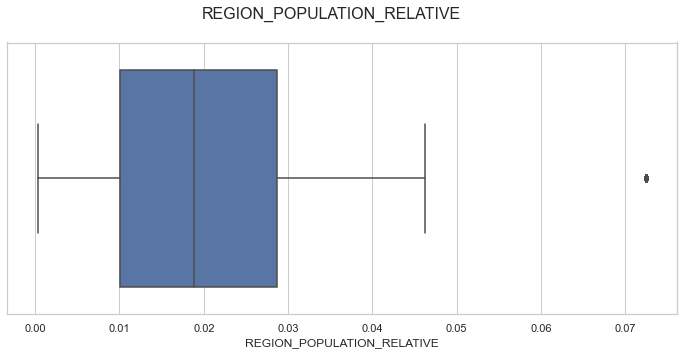

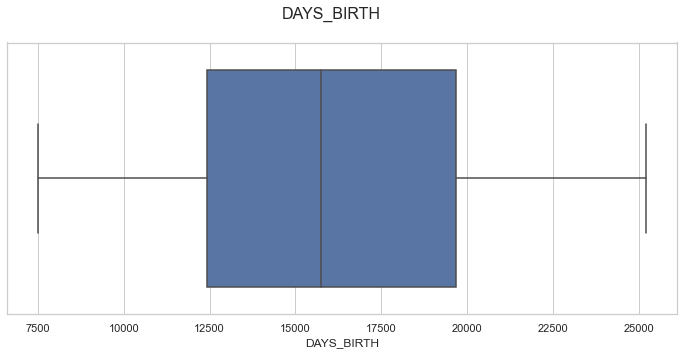

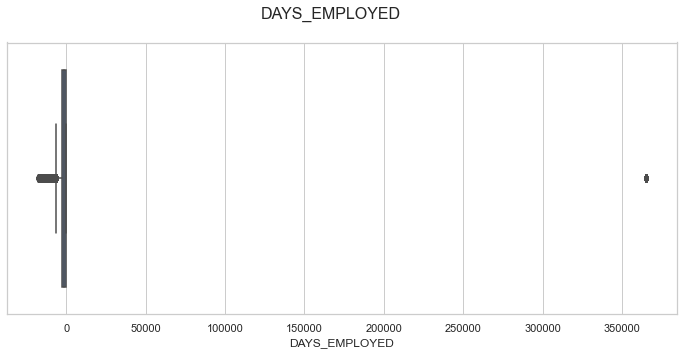

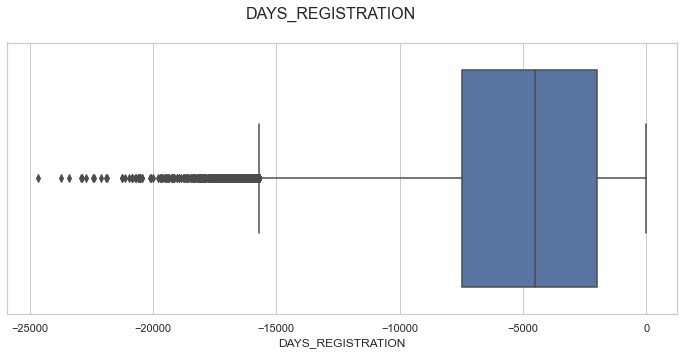

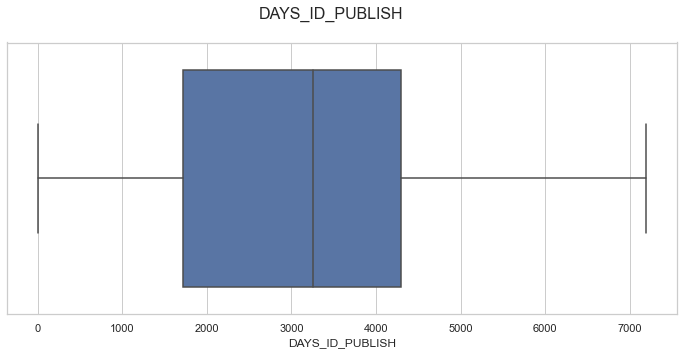

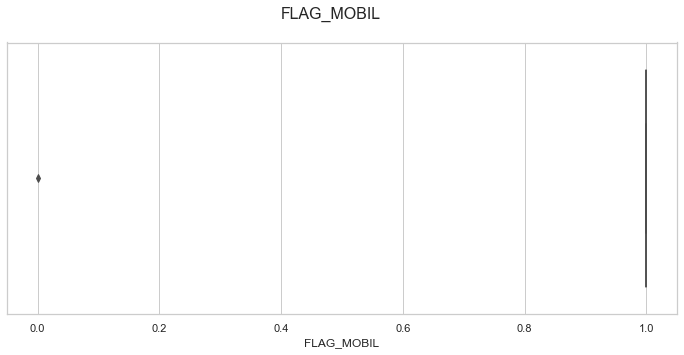

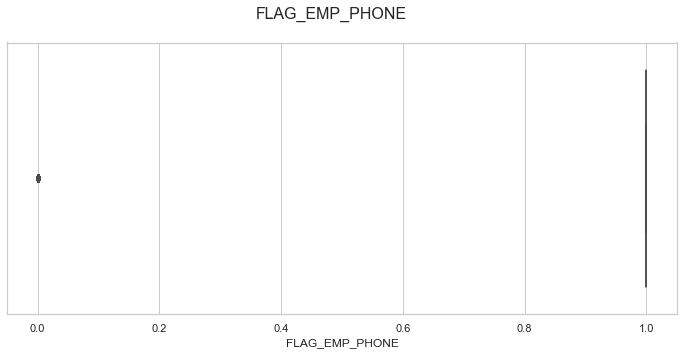

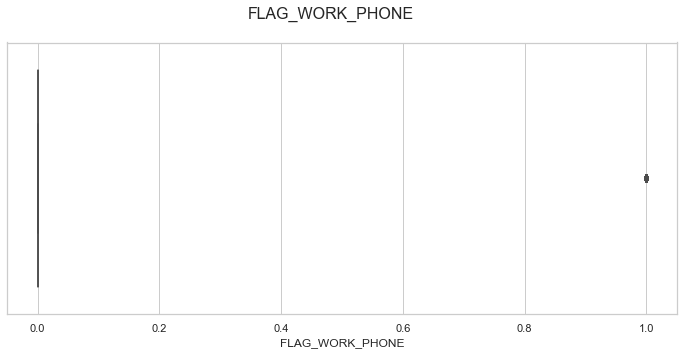

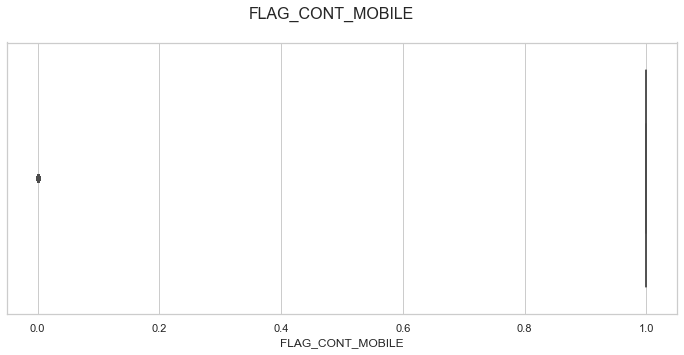

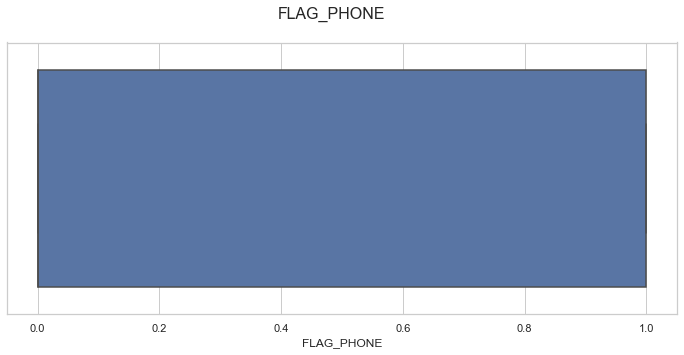

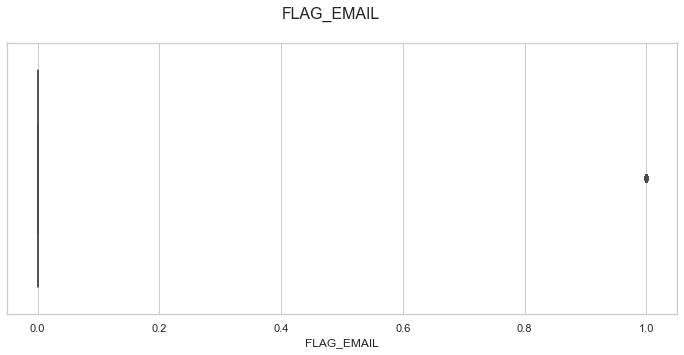

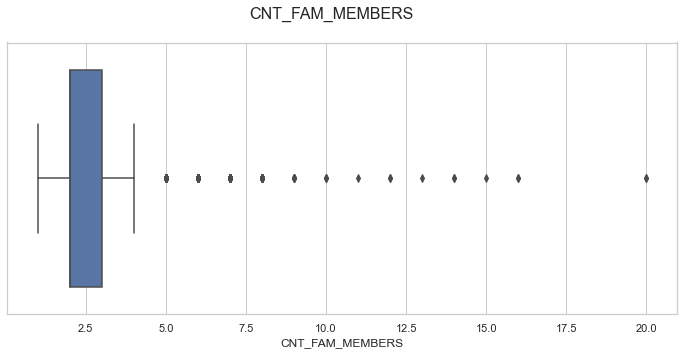

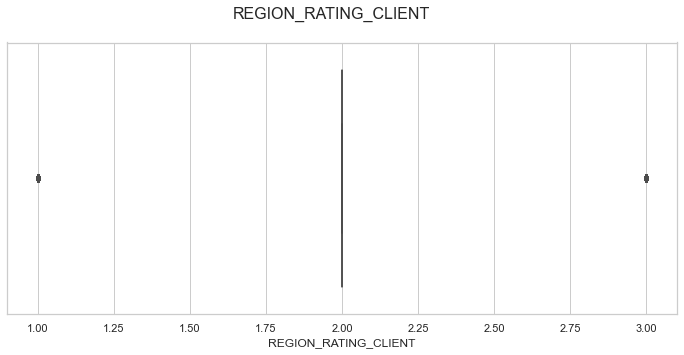

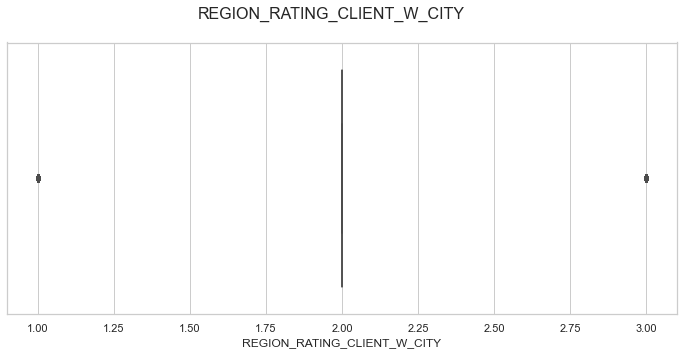

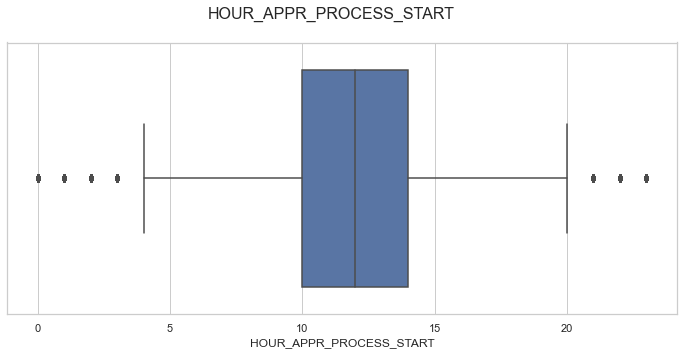

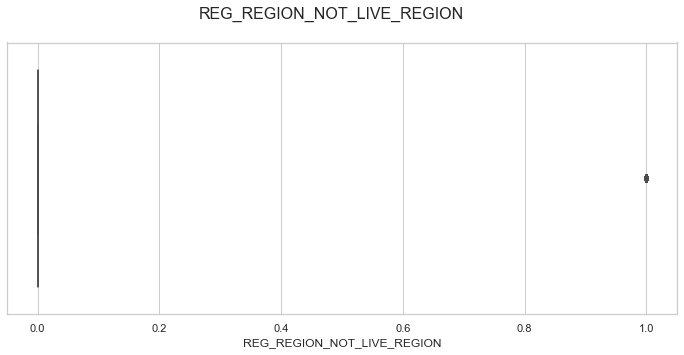

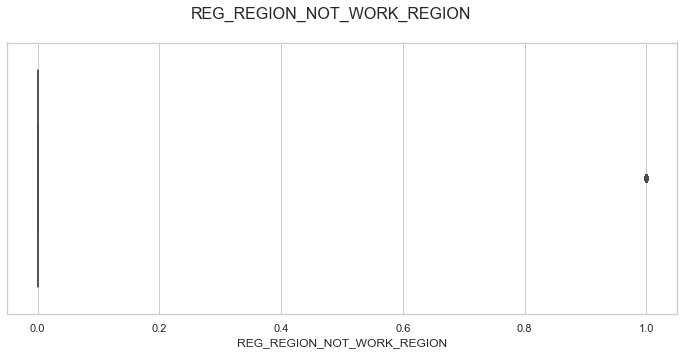

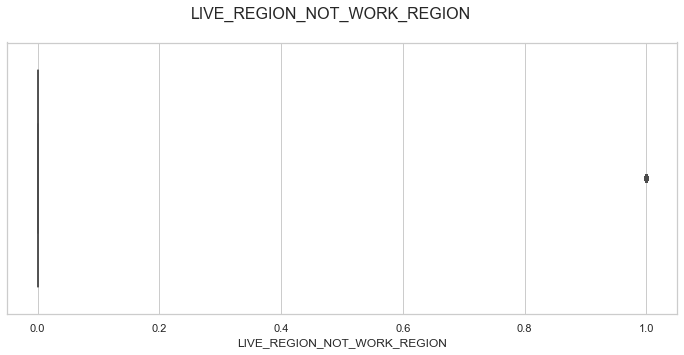

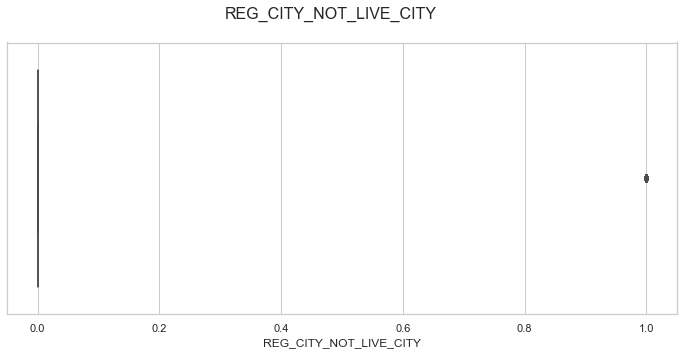

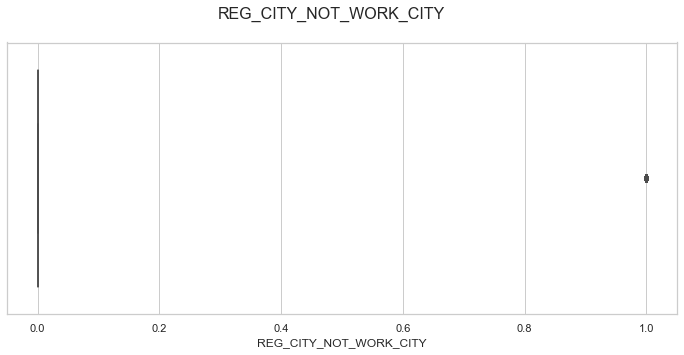

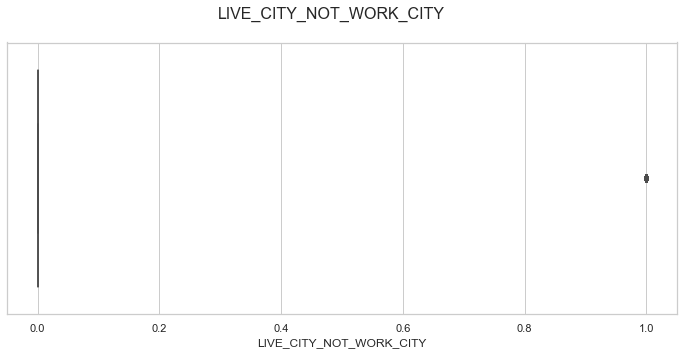

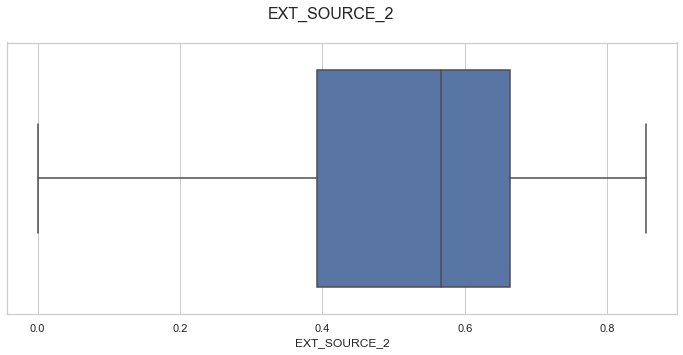

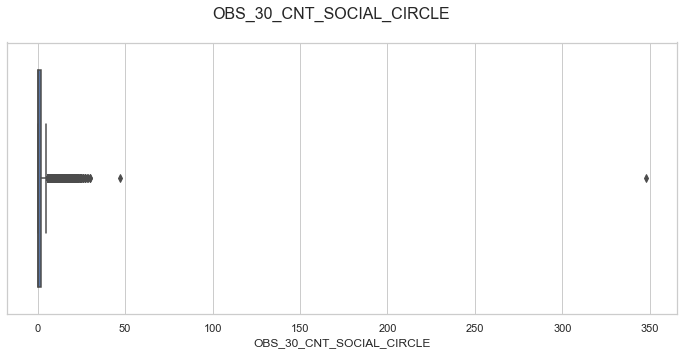

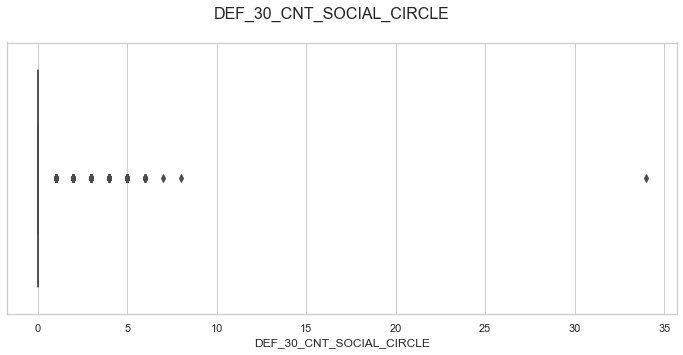

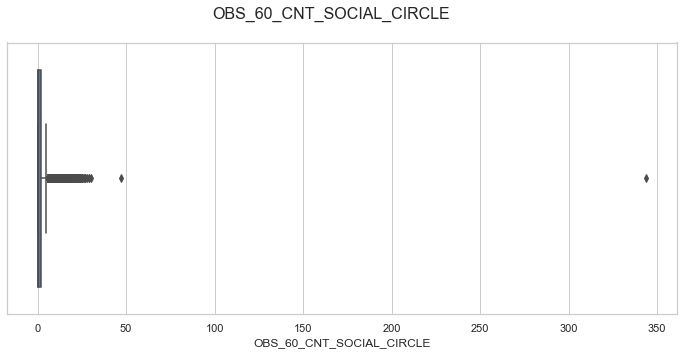

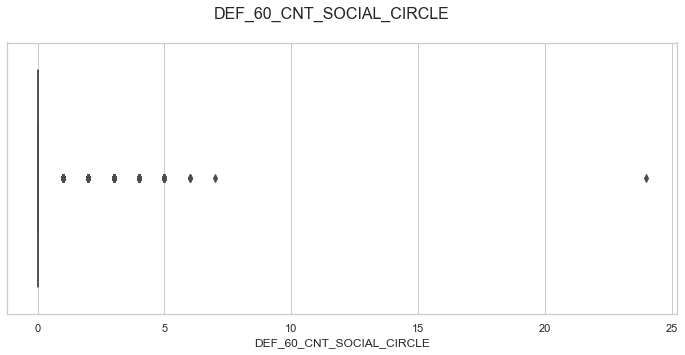

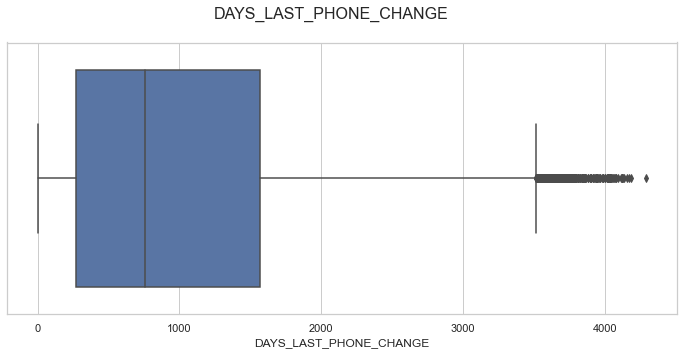

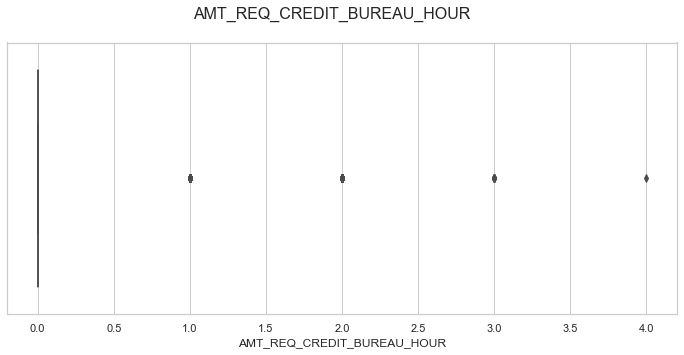

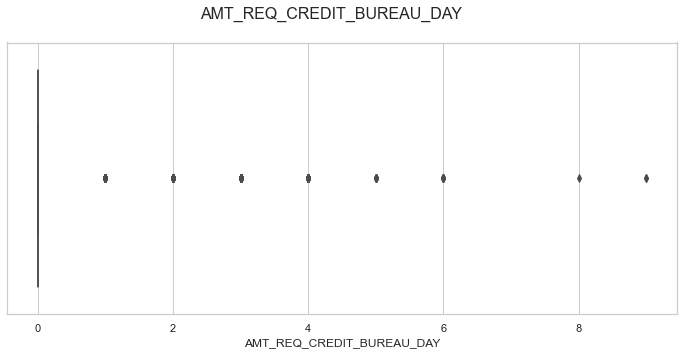

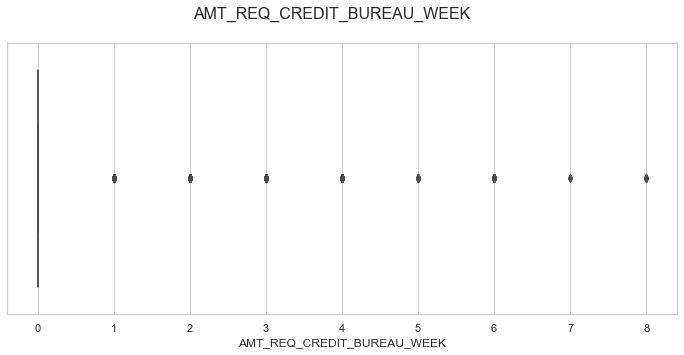

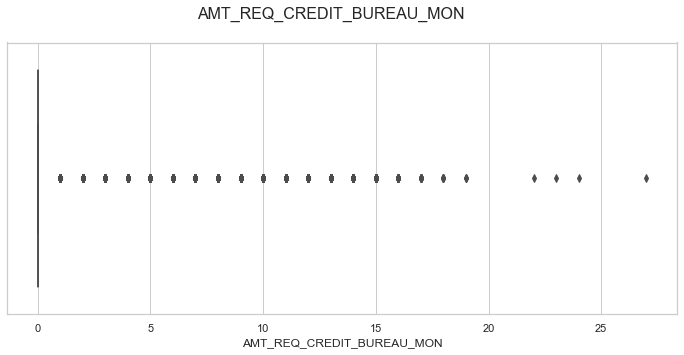

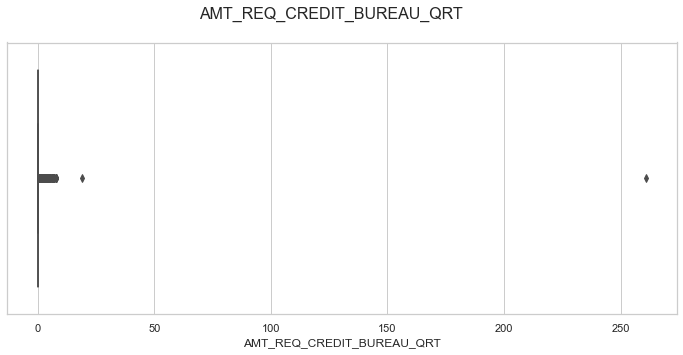

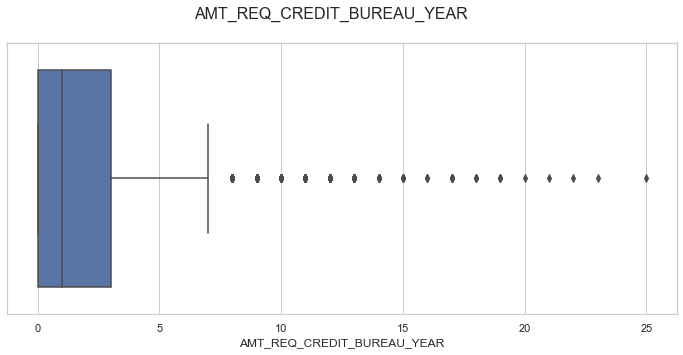

In [53]:
sns.set(style="whitegrid")
for cols,values in outlier_df.iteritems():
    f, ax = plt.subplots(1,1,figsize=(12,5))
    f.suptitle(cols, fontsize=16)
    outlier_plot = sns.boxplot(outlier_df[cols])
    plt.show()

Above box plot for **'CNT_CHILDREN'** shows a large outlier(19). Since a family cannot or very rare to have 19 children.

In the **'DAYS_EMPLOYED'** there is a value present at 36k range, this will not be possible. This could have occurred during data entry

In the plot for **AMT_INCOME_TOTAL**, it can be visually seen that the MAX amount is larger than the other statistical datas[Mean,(25,50,75)percentiles]

In [54]:
appdata[['CNT_CHILDREN','DAYS_EMPLOYED','AMT_INCOME_TOTAL']].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0


In [55]:
#since CNT_CHILDREN have larger outlier, so normalizing 
q1 = appdata['CNT_CHILDREN'].quantile(0.99)
appdata['CNT_CHILDREN'] = appdata['CNT_CHILDREN'].apply(lambda x: q1 if x>q1 else x)

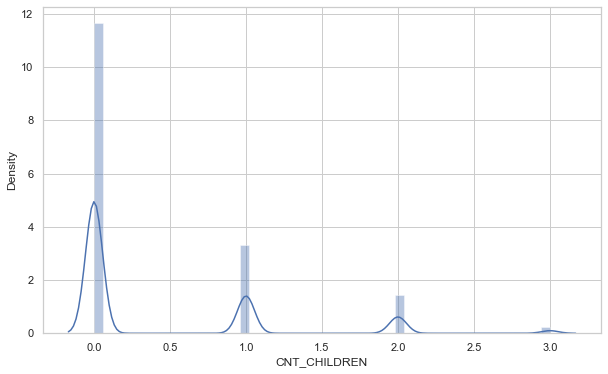

In [56]:
# displaying a plot to show that the values have been restricted to a max value as 3
f, ax = plt.subplots(figsize=(10,6))
outlier_plot_1 = sns.distplot(appdata["CNT_CHILDREN"])

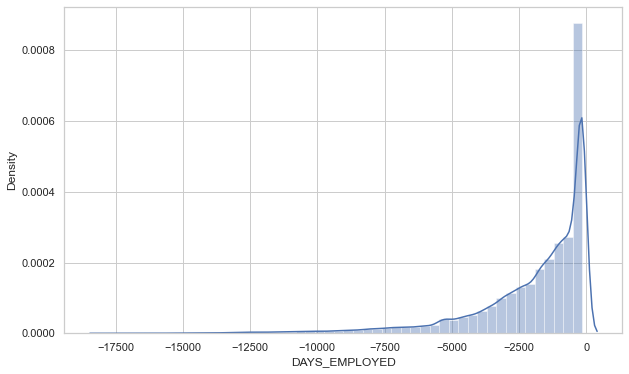

In [57]:
# displaying a plot to show that the values have been restricted so that we dont get highly distributed values

q2=appdata["DAYS_EMPLOYED"].quantile(0.80)
appdata["DAYS_EMPLOYED"] =  appdata.DAYS_EMPLOYED.apply(lambda x: q2 if x>q2 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_2 = sns.distplot(appdata["DAYS_EMPLOYED"])

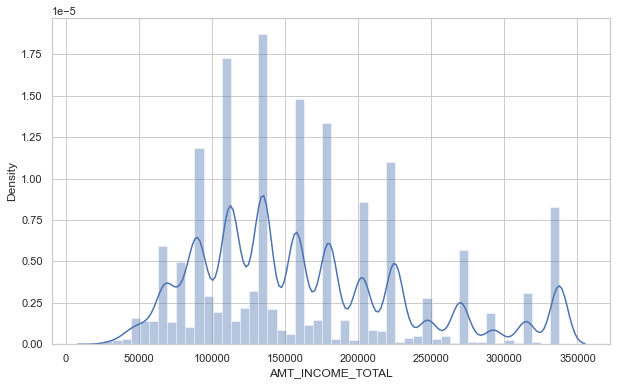

In [58]:
#  displaying a plot to show that the values have been restricted so that we dont get highly distributed values

q3=appdata["AMT_INCOME_TOTAL"].quantile(0.95)
appdata["AMT_INCOME_TOTAL"] =  appdata.AMT_INCOME_TOTAL.apply(lambda x: q3 if x>q3 else x)

f, ax = plt.subplots(figsize=(10,6))
outlier_plot_3 = sns.distplot(appdata["AMT_INCOME_TOTAL"])

In [59]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Converting DAYS_BIRTH to AGE
appdata["AGE"] = appdata.DAYS_BIRTH.apply(lambda x :round(abs(x)/365),0)
appdata["AGE"]
appdata["AGE"] = pd.to_numeric(appdata["AGE"])

In [61]:
#Dropping the DAYS_Birth column since we have created an AGE column for the same
appdata.drop('DAYS_BIRTH',axis=1,inplace=True)

In [62]:
#checking 25%, 50%, 85%, 100% of the Income
appdata.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.85,1])

0.25    112500.0
0.50    147150.0
0.85    234000.0
1.00    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
#Rounding of the Family Member as we cannot have them in floating type
appdata.CNT_FAM_MEMBERS.unique()

appdata['CNT_FAM_MEMBERS'] = appdata['CNT_FAM_MEMBERS'].apply(lambda x: round(x,0))

#### Binning Salary Amount to categories

In [64]:
appdata.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.85,1])

0.25    112500.0
0.50    147150.0
0.85    234000.0
1.00    337500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
# Based on the Quantile Values , segregating the values to its respective categories
def salary_category_func(x):
    if x>=234000:
        return('HIGH')
    elif x<234000 and x>=147150:
        return('FAIR')
    elif x<147150 and x>=112500:
        return('AVGERAGE')
    else:
        return("BELOW AVERAGE")
appdata["SALARY_CATEGORY"] = appdata.AMT_INCOME_TOTAL.apply(salary_category_func)    
appdata["SALARY_CATEGORY"]

0                  FAIR
1                  HIGH
2         BELOW AVERAGE
3              AVGERAGE
4              AVGERAGE
              ...      
307506             FAIR
307507    BELOW AVERAGE
307508             FAIR
307509             FAIR
307510             FAIR
Name: SALARY_CATEGORY, Length: 307511, dtype: object

In [66]:
appdata["SALARY_CATEGORY"].value_counts()

FAIR             106966
AVGERAGE          84194
BELOW AVERAGE     69559
HIGH              46792
Name: SALARY_CATEGORY, dtype: int64

#### Analysing the count of Target variables

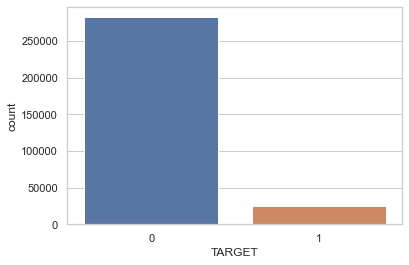

In [67]:
Target_count= sns.countplot("TARGET",data =appdata, )

We can see there is a huge imbalance in our Target variable. So we can divide the Target variable into two different dataframes

In [68]:
appdata.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Dividing the Application Data into Two Dataframes based on the Target Variable

In [69]:
non_defaulter = appdata[appdata.TARGET == 0]
defaulter = appdata[appdata.TARGET == 1]

In [70]:
non_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  int64  
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  float64
 7   AMT_INCOME_TOTAL             282686 non-null  float64
 8   AMT_CREDIT                   282686 non-null  float64
 9   AMT_ANNUITY                  282674 non-null  float64
 10  AMT_GOODS_PRICE              282429 non-null  float64
 11  NAME_TYPE_SUITE              281464 non-null  object 
 12  NAME_INCOME_TYPE             282686 non-null  object 
 13 

In [71]:
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  float64
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24804 non-null  float64
 11  NAME_TYPE_SUITE              24755 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_

### Check for clients who are DEFAULTER (unlikely to pay the loans)

In [72]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Univariate_defaulter_Num_1_df = defaulter.select_dtypes(include=numerics)
Univariate_defaulter_Num_1_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-637.0,-3648.0,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,26
26,100031,1,0.0,112500.0,979992.0,27076.5,702000.0,0.018029,-2628.0,-6573.0,...,10.0,0.0,161.0,0.0,0.0,0.0,0.0,2.0,2.0,51
40,100047,1,0.0,202500.0,1193580.0,35028.0,855000.0,0.025164,-1262.0,-1182.0,...,0.0,0.0,1075.0,0.0,0.0,0.0,2.0,0.0,4.0,48
42,100049,1,0.0,135000.0,288873.0,16258.5,238500.0,0.007305,-3597.0,-45.0,...,1.0,0.0,1480.0,0.0,0.0,0.0,0.0,0.0,2.0,37
81,100096,1,0.0,81000.0,252000.0,14593.5,252000.0,0.028663,-144.0,-5391.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,1.0,207000.0,450000.0,32746.5,450000.0,0.020246,-3048.0,-8507.0,...,0.0,0.0,324.0,0.0,0.0,0.0,0.0,0.0,2.0,27
307475,456215,1,1.0,144000.0,1303200.0,46809.0,1125000.0,0.007330,-2405.0,-500.0,...,0.0,0.0,1492.0,0.0,0.0,0.0,1.0,0.0,6.0,37
307481,456225,1,0.0,225000.0,297000.0,19975.5,297000.0,0.008575,-3147.0,-8921.0,...,0.0,0.0,2941.0,0.0,0.0,0.0,0.0,0.0,3.0,57
307489,456233,1,0.0,225000.0,521280.0,23089.5,450000.0,0.014464,-286.0,-8291.0,...,1.0,0.0,307.0,0.0,0.0,0.0,0.0,1.0,2.0,45


In [73]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =defaulter.select_dtypes(include=categorical)
Univariate_defaulter_Cat_1_df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SALARY_CATEGORY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,FAIR
26,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,MONDAY,Business Entity Type 3,AVGERAGE
40,Cash loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,FAIR
42,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,THURSDAY,Self-employed,AVGERAGE
81,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,THURSDAY,XNA,BELOW AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Business Entity Type 3,FAIR
307475,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,Laborers,THURSDAY,Construction,AVGERAGE
307481,Cash loans,M,N,Y,Family,Working,Secondary / secondary special,Married,House / apartment,Managers,FRIDAY,Business Entity Type 3,FAIR
307489,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,FAIR


##### FLAG_OWNREALTY
We will compare and check how the possesion of a property affects the repayment of loans.

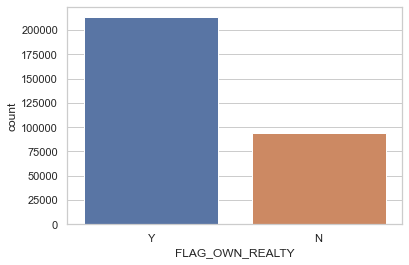

In [74]:
#graph to plot Number of property owners and non-property owners in the entire population
PropertyOwners_vs_Total = sns.countplot("FLAG_OWN_REALTY",data =appdata)

From above plot, we can observe that clients having some sort of real estate are more that the ones who don't have any property/real estate.

In [75]:
#find the percentage of property and non-property owners in the defaulter list
test_df1=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_REALTY"].value_counts()/appdata["FLAG_OWN_REALTY"].value_counts())*100,2)
test_df1 = pd.DataFrame(test_df1)
test_df1.reset_index(level=0, inplace=True)
test_df1.rename(columns=  {"index": "FLAG_OWN_REALTY", 
                     "FLAG_OWN_REALTY":"Default_Percentage"}, 
                                 inplace = True) 
test_df1

,FLAG_OWN_REALTY,Default_Percentage
0,Y,7.96
1,N,8.32


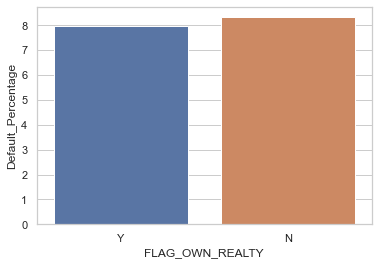

In [76]:
#plot to show the number of property and non-property owners vs. Target variable. Here, Target = 1

PropertyOwners_vs_Target= sns.barplot(x="FLAG_OWN_REALTY",y="Default_Percentage",data=test_df1)

From above graph, we can see that the number of non-payers of loan i.e., defaulters are very close to 9%. It is difficult to decide a target based on this metric.

#### CODE GENDER
Let's compare and check how the gender of client affects the repayment of loans.

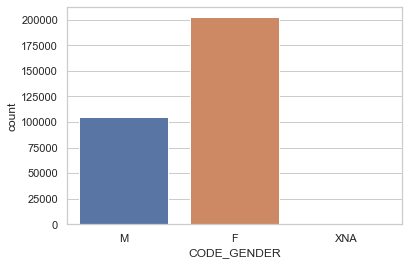

In [77]:
#graph to plot Males and females in the entire population
Gender_vs_Total = sns.countplot("CODE_GENDER",data =appdata)

In [78]:
#find the percentage of males and females in the defaulter list
test_df2=round((Univariate_defaulter_Cat_1_df["CODE_GENDER"].value_counts()/appdata["CODE_GENDER"].value_counts())*100,2)
test_df2 = pd.DataFrame(test_df2)
test_df2.reset_index(level=0, inplace=True)
test_df2.rename(columns=  {"index": "CODE_GENDER", 
                     "CODE_GENDER":"Default_Percentage"}, 
                                 inplace = True) 
test_df2

,CODE_GENDER,Default_Percentage
0,F,7.00
1,M,10.14
2,XNA,NaN


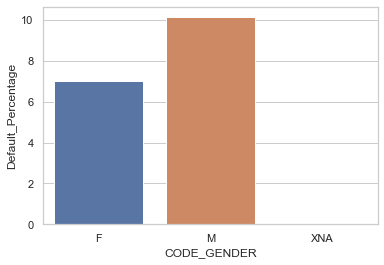

In [79]:
#plot to show the number of male and female clients vs. Target variable. Here, Target = 1
Gender_vs_Target= sns.barplot(x="CODE_GENDER",y="Default_Percentage",data=test_df2)

So, from above plots and data we can cleary see that the Female clients are better TARGET as compared to the Male clients. 

Observing the percent of defaulted credits, Male clients have higher chance of not returning their loans [10.14%], compared to the female clients [7%].

#### FLAG_OWNCAR
Let's compare and check how the car owners and non-car owners differ in their repayment of loans.

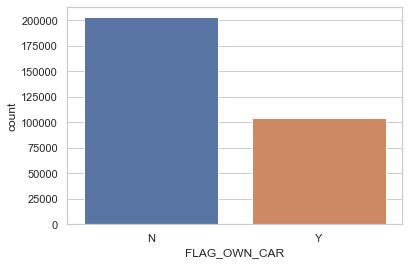

In [80]:
#graph to plot car owners and non-car Owners in the entire population
CarOwner_vs_Total = sns.countplot("FLAG_OWN_CAR",data =appdata)

We have more client who don't own a car

In [81]:
#find the percentage of car owners and non-car Owners in the defaulter list
test_df3=round((Univariate_defaulter_Cat_1_df["FLAG_OWN_CAR"].value_counts()/appdata["FLAG_OWN_CAR"].value_counts())*100,2)
test_df3 = pd.DataFrame(test_df3)
test_df3.reset_index(level=0, inplace=True)
test_df3.rename(columns=  {"index": "FLAG_OWN_CAR", 
                     "FLAG_OWN_CAR":"Default_Percentage"}, 
                                 inplace = True) 
test_df3

,FLAG_OWN_CAR,Default_Percentage
0,N,8.50
1,Y,7.24


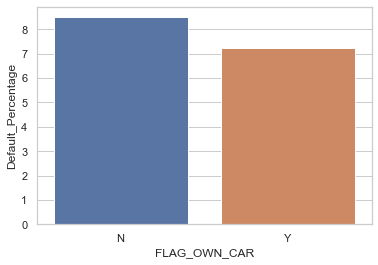

In [82]:
#plot to show the car owners and non-car Owners vs. Target variable. Here, Target = 1
CarOwner_vs_Target= sns.barplot(x="FLAG_OWN_CAR",y="Default_Percentage",data=test_df3)

As we can see from above graph,the clients that own a car are less likely to not repay the loan when compared to the ones that do not own a car. The loan non-repayment rates of both the Car Owners and Non-Car Owners are very close which is interesting to see and indicates that probably this metric will not be a suitable one when targeting a client.

#### NAME_FAMILYSTATUS
Let's compare and check how the family status of clients affect their repayment of loans.

In [83]:
status = appdata.NAME_FAMILY_STATUS.value_counts()
status = pd.DataFrame(status)
status.reset_index(level=0, inplace=True)
status.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"number"}, 
                                 inplace = True) 
status

,NAME_FAMILY_STATUS,number
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


<function matplotlib.pyplot.show(close=None, block=None)>

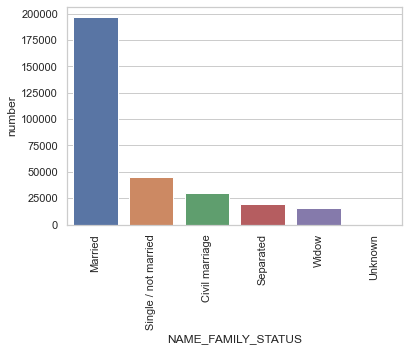

In [84]:
#graph to plot family status of clients in the entire population
FamilyStatus_vs_Total = sns.barplot(x="NAME_FAMILY_STATUS",y="number",data =status)
FamilyStatus_vs_Total.set_xticklabels(FamilyStatus_vs_Total.get_xticklabels(),rotation=90)
plt.show

It is evident that most of the clients are Married, followed by Single and Civil marriage

In [85]:
#find the percentage of clients according to family status in the defaulter list
test_df4=round((Univariate_defaulter_Cat_1_df["NAME_FAMILY_STATUS"].value_counts()/appdata["NAME_FAMILY_STATUS"].value_counts())*100,2)
test_df4 = pd.DataFrame(test_df4)
test_df4.reset_index(level=0, inplace=True)
test_df4.rename(columns=  {"index": "NAME_FAMILY_STATUS", 
                     "NAME_FAMILY_STATUS":"Default_Percentage"}, 
                                 inplace = True) 
test_df4.sort_values(by='Default_Percentage', inplace=True)
test_df4

,NAME_FAMILY_STATUS,Default_Percentage
5,Widow,5.82
1,Married,7.56
2,Separated,8.19
3,Single / not married,9.81
0,Civil marriage,9.94
4,Unknown,NaN


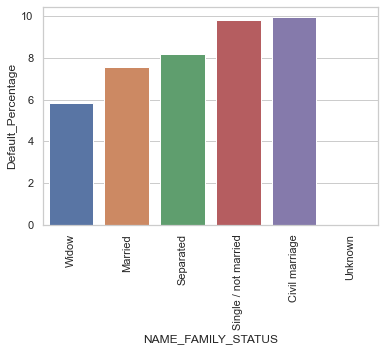

In [86]:
#plot to show the family status of client vs. Target variable. Here, Target = 1
FamilyStatus_vs_Target= sns.barplot(x="NAME_FAMILY_STATUS",y="Default_Percentage",data=test_df4)
FamilyStatus_vs_Target.set_xticklabels(FamilyStatus_vs_Target.get_xticklabels(),rotation=90)
plt.show()

The percentage of non-repayment of loan is at highest for civil marriage and is lowest for widows, Which is interesting to see because you expect widows not to payback their loans but it is the opposite here.

#### CNTCHILDREN
Now, let's compare how the number of children in a family affects the non-repayment of loans.

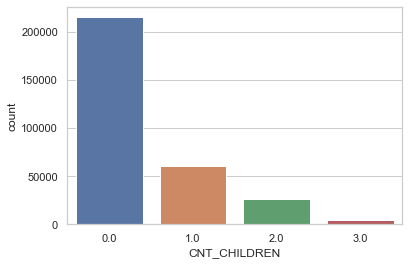

In [87]:
#graph to plot Number of children per client in the entire population
NoOfChildren_vs_Total = sns.countplot("CNT_CHILDREN",data =appdata)

In [88]:
#find the percentage of number of children per client in the defaulter list
test_df5=round((Univariate_defaulter_Num_1_df["CNT_CHILDREN"].value_counts()/appdata["CNT_CHILDREN"].value_counts())*100,2)
test_df5 = pd.DataFrame(test_df5)
test_df5.reset_index(level=0, inplace=True)

test_df5.rename(columns=  {"index": "CNT_CHILDREN", 
                     "CNT_CHILDREN":"Default_Percentage"}, 
                                 inplace = True)
test_df5.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df5

,CNT_CHILDREN,Default_Percentage
3,3.0,10.04
1,1.0,8.92
2,2.0,8.72
0,0.0,7.71


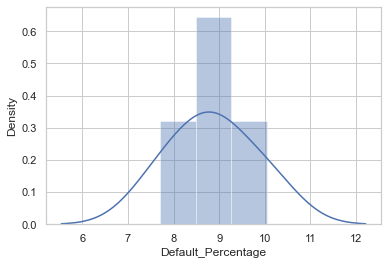

In [89]:
#plot to show the number of children per client vs. Target variable. Here, Target = 1

NoOfChildren_vs_Target = sns.distplot(test_df5["Default_Percentage"])
plt.show()

There is more chance for a client with more children to not repay the loan back. This can be beacuse of the more liability that is on the client. 

The more the number of children, the more difficult it is for the client to repay the loan due to more personal expenditures.

#### CNT_FAMMEMBERS

In [90]:
fam = appdata.CNT_FAM_MEMBERS.value_counts()
fam = pd.DataFrame(fam)
fam.reset_index(level=0, inplace=True)
fam.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"number"}, 
                                 inplace = True) 
fam

,CNT_FAM_MEMBERS,number
0,2.0,158357
1,1.0,67847
2,3.0,52601
3,4.0,24697
4,5.0,3478
5,6.0,408
6,7.0,81
7,8.0,20
8,9.0,6
9,10.0,3


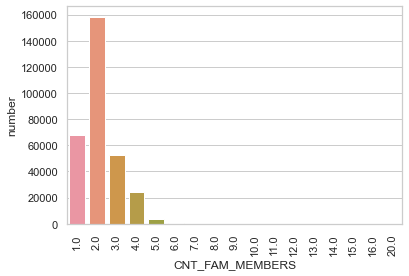

In [91]:
#graph to plot Number of family members per client in the entire population

NoOfFamilyMembers_vs_Total = sns.barplot(x="CNT_FAM_MEMBERS",y="number",data =fam)
NoOfFamilyMembers_vs_Total.set_xticklabels(NoOfFamilyMembers_vs_Total.get_xticklabels(),rotation=90)
plt.show()

In [92]:
#find the percentage  number of family members per client the defaulter list

test_df6=round((Univariate_defaulter_Num_1_df["CNT_FAM_MEMBERS"].value_counts()/appdata["CNT_FAM_MEMBERS"].value_counts())*100,2)
test_df6 = pd.DataFrame(test_df6)
test_df6.reset_index(level=0, inplace=True)
test_df6.rename(columns=  {"index": "CNT_FAM_MEMBERS", 
                     "CNT_FAM_MEMBERS":"Default_Percentage"}, 
                                 inplace = True) 
test_df6.sort_values(by=["Default_Percentage"],ascending=False,inplace=True)
test_df6

,CNT_FAM_MEMBERS,Default_Percentage
10,11.0,100.00
12,13.0,100.00
9,10.0,33.33
7,8.0,30.00
5,6.0,13.48
4,5.0,9.40
2,3.0,8.76
3,4.0,8.65
0,1.0,8.36
1,2.0,7.58


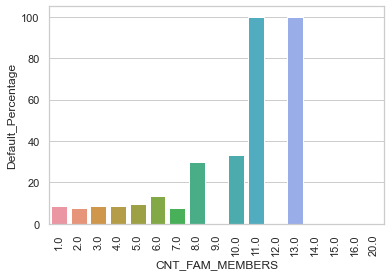

In [93]:
#plot to show the number of family members per client vs. Target variable. Here, Target = 

NoOfFamilyMembers_vs_Target= sns.barplot(x="CNT_FAM_MEMBERS",y="Default_Percentage",data=test_df6)
NoOfFamilyMembers_vs_Target.set_xticklabels(NoOfFamilyMembers_vs_Target.get_xticklabels(),rotation=90)

plt.show()

#### NAME_EDUCATIONTYPE

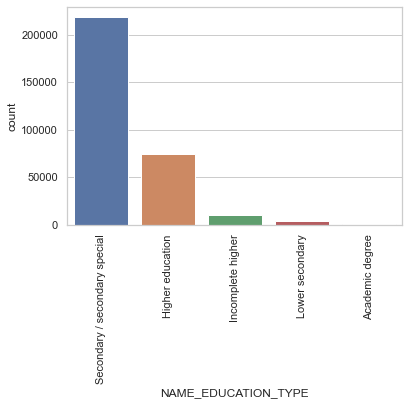

In [94]:
#graph to plot education type in the entire population

EducationType_vs_Total = sns.countplot("NAME_EDUCATION_TYPE",data =appdata)
EducationType_vs_Total.set_xticklabels(EducationType_vs_Total.get_xticklabels(),rotation=90)
plt.show()

In [95]:
#find the percentage education level of clients in the defaulter list

test_df7=round((Univariate_defaulter_Cat_1_df["NAME_EDUCATION_TYPE"].value_counts()/appdata["NAME_EDUCATION_TYPE"].value_counts())*100,2)

test_df7 = pd.DataFrame(test_df7)

test_df7.reset_index(level=0, inplace=True)
test_df7.sort_values(by=["NAME_EDUCATION_TYPE"],ascending=False,inplace=True)

test_df7.rename(columns=  {"index": "NAME_EDUCATION_TYPE", 
                     "NAME_EDUCATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df7

,NAME_EDUCATION_TYPE,Default_Percentage
3,Lower secondary,10.93
0,Secondary / secondary special,8.94
2,Incomplete higher,8.48
1,Higher education,5.36
4,Academic degree,1.83


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='Default_Percentage'>

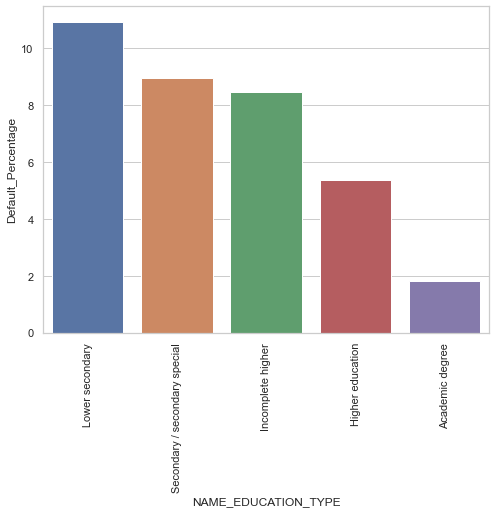

In [96]:
#plot to show the education type of each client vs. Target variable. Here, Target = 1

f, ax = plt.subplots(figsize=(8,6))
EducationType_vs_Target= sns.barplot(x="NAME_EDUCATION_TYPE",y="Default_Percentage",data=test_df7,order=test_df7['NAME_EDUCATION_TYPE'])
EducationType_vs_Target.set_xticklabels(EducationType_vs_Target.get_xticklabels(), rotation=90)
EducationType_vs_Target

It can be observed that the more educated clients are likely to repay their loans because they will be having more stable jobs with monthly income.

#### ORGANISATIONTYPE

In [97]:
test_df8=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/appdata["ORGANIZATION_TYPE"].value_counts())*100,2)

test_df8 = pd.DataFrame(test_df8)

test_df8.reset_index(level=0, inplace=True)
test_df8.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

test_df8.rename(columns=  {"index": "ORGANIZATION_TYPE", 
                     "ORGANIZATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test_df8

,ORGANIZATION_TYPE,Default_Percentage
54,Transport: type 3,15.75
18,Industry: type 13,13.43
25,Industry: type 8,12.50
38,Restaurant,11.71
7,Construction,11.68
6,Cleaning,11.15
14,Industry: type 1,11.07
20,Industry: type 3,10.62
36,Realtor,10.61
1,Agriculture,10.47


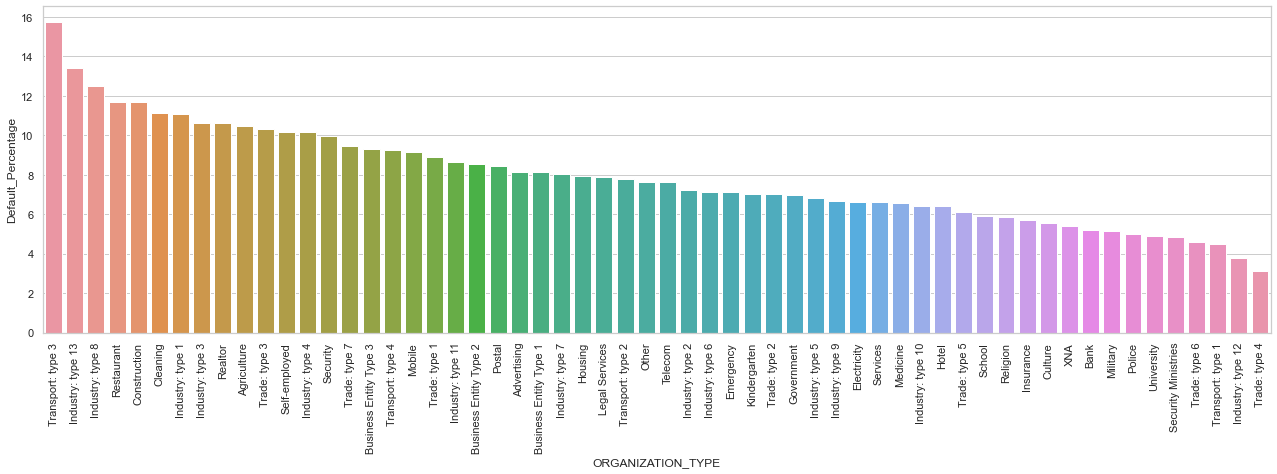

In [98]:
f, ax = plt.subplots(figsize=(22,6))
OrganizationType_vs_Target= sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=test_df8
                                         ,order=test_df8['ORGANIZATION_TYPE'])
OrganizationType_vs_Target.set_xticklabels(OrganizationType_vs_Target.get_xticklabels(), rotation=90)
OrganizationType_vs_Target
plt.show()

Highest number of non-repayment can be seen in Applicants who work in Transport Type3.

#### NAME_HOUSINGTYPE

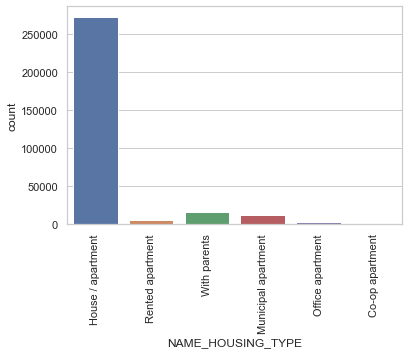

In [99]:
#graph to plot housing type of each client in the entire population

HousingType_vs_Total = sns.countplot("NAME_HOUSING_TYPE",data = appdata)
HousingType_vs_Total.set_xticklabels(HousingType_vs_Total.get_xticklabels(),rotation=90)
plt.show()

In [100]:
#find the percentage of housing type of each client the defaulter list

test_df9=round((Univariate_defaulter_Cat_1_df["NAME_HOUSING_TYPE"].value_counts()/appdata["NAME_HOUSING_TYPE"].value_counts())*100,2)
test_df9 = pd.DataFrame(test_df9)
test_df9.reset_index(level=0, inplace=True)
test_df9.rename(columns=  {"index": "NAME_HOUSING_TYPE", 
                     "NAME_HOUSING_TYPE":"Default_Percentage"}, 
                                 inplace = True) 
test_df9.sort_values(by = 'Default_Percentage' , inplace = True, ascending = False)
test_df9

,NAME_HOUSING_TYPE,Default_Percentage
3,Rented apartment,12.31
1,With parents,11.70
2,Municipal apartment,8.54
5,Co-op apartment,7.93
0,House / apartment,7.80
4,Office apartment,6.57


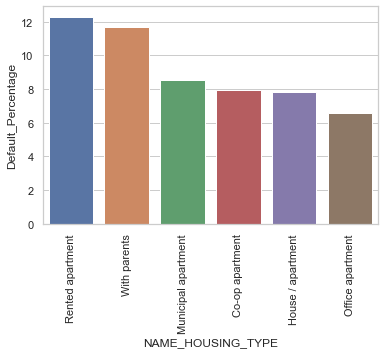

In [101]:
#plot to show the housing type of each client client vs. Target variable. Here, Target = 1

HousingType_vs_Target= sns.barplot(x="NAME_HOUSING_TYPE",y="Default_Percentage",data=test_df9)
HousingType_vs_Target.set_xticklabels(HousingType_vs_Target.get_xticklabels(),rotation=90)
plt.show()

It can be observed that people with rented apartments are less likely to pay back their loans. This can be because they already have more liabilities compared to other type of people who do not have this liability.

## BIVARIATE ANALYSIS

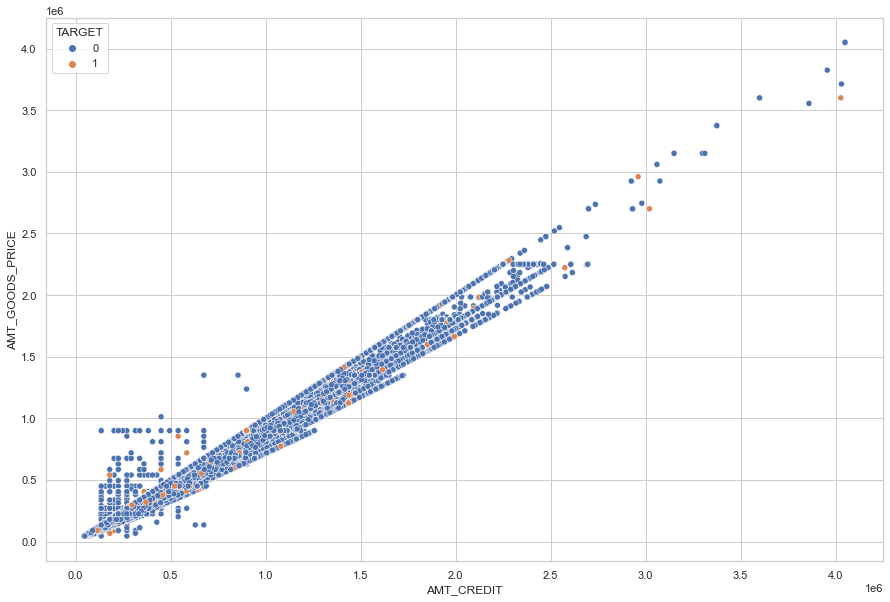

In [169]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot("AMT_CREDIT","AMT_GOODS_PRICE",data=appdata,hue="TARGET")
plt.show()

#### Salary Category vs Client who have provided their Home Number

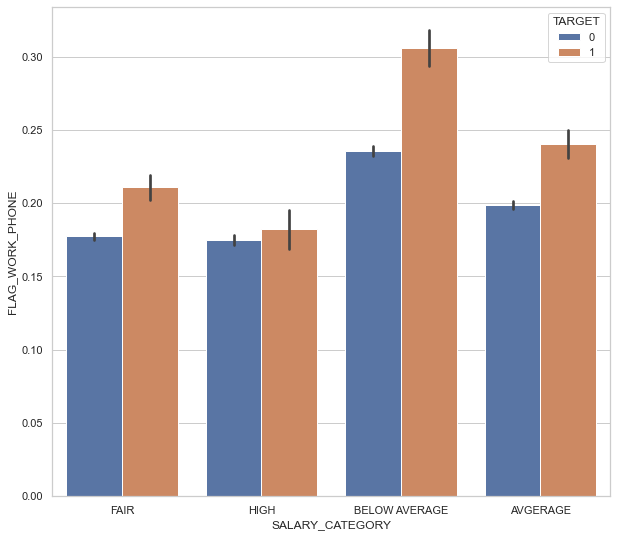

In [103]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","FLAG_WORK_PHONE",data=appdata,hue="TARGET")
plt.show()

Client with BELOW AVERAGE salary & their address doest match, are having higher chance to be a defaulter

#### Salary vs Client whose Permanent Address not match with Contact Address - City Level

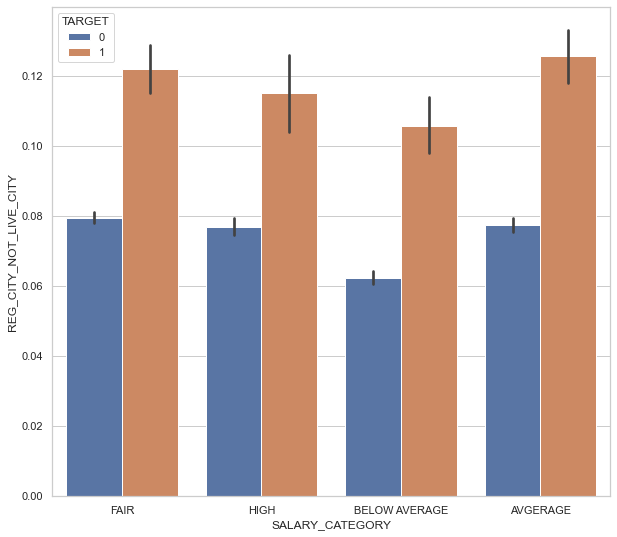

In [104]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_CITY_NOT_LIVE_CITY",data=appdata,hue="TARGET")
plt.show()

Client with AVERAGE salary and if CONTACT address(CITY-LEVEL) does not match, then there is a higher chance to be defaulter

#### Salary vs Client whose Permanent Address not match with Work Address - City Level

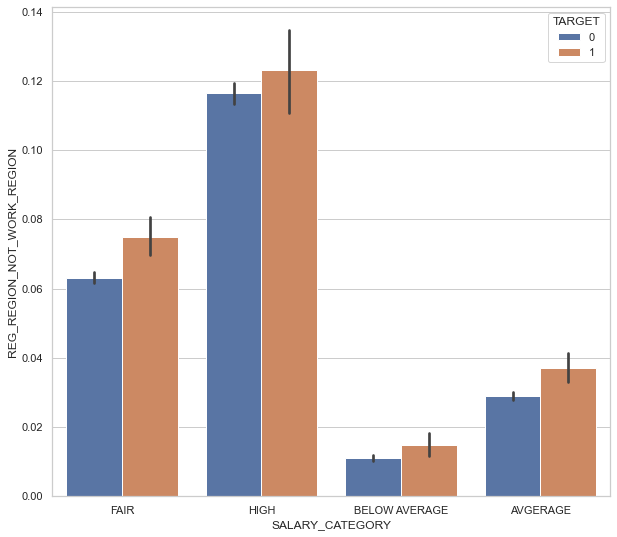

In [105]:
f, ax = plt.subplots(figsize=(10,9))
plot_1=sns.barplot("SALARY_CATEGORY","REG_REGION_NOT_WORK_REGION",data=appdata,hue="TARGET")
plt.show()

## INCOME TYPE

#### Income vs Children count

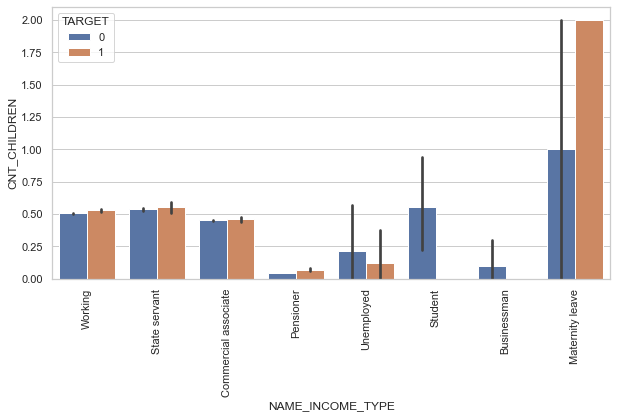

In [106]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_CHILDREN",data=appdata,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

People getting income via Maternity Leave tends to be more Defaulter when they have more children

#### Income vs No. of FamilyMembers

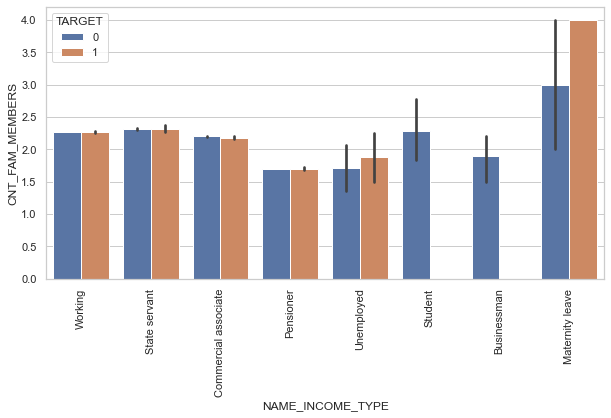

In [107]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_INCOME_TYPE","CNT_FAM_MEMBERS",data=appdata,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

People getting income via Maternity Leave tends to be more Defaulter when they have more Family Members

#### FAMILY STATUS

#### Family Status vs Count Of Children

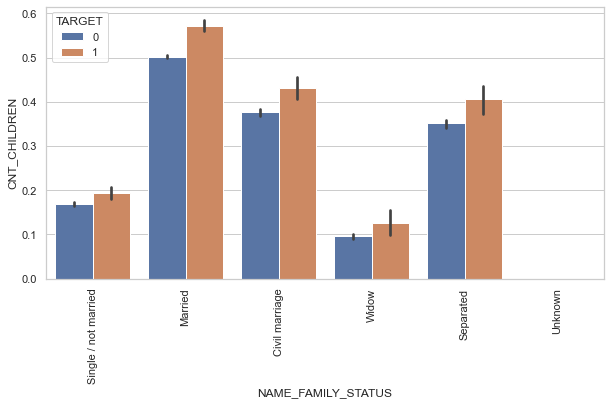

In [108]:
f, ax = plt.subplots(figsize=(10,5))
plot_1=sns.barplot("NAME_FAMILY_STATUS","CNT_CHILDREN",data=appdata,hue="TARGET")
plot_1.set_xticklabels(plot_1.get_xticklabels(), rotation=90)
plt.show()

Client who are married and has more children (5+), have high chances to be a defaulter. This is may be due to the Economic situation of their family, because of more children

### Based on the Bivariate analyses, few columns proved to be of no use, so we are dropping them

In [109]:
appdata.drop(["HOUR_APPR_PROCESS_START","FLAG_MOBIL"],axis=1,inplace=True)

## ANALYSING CORRELATION OF TARGET VARIABLE VS OTHER VARIABLES

In [1]:
Correlation = appdata.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)

NameError: name 'appdata' is not defined

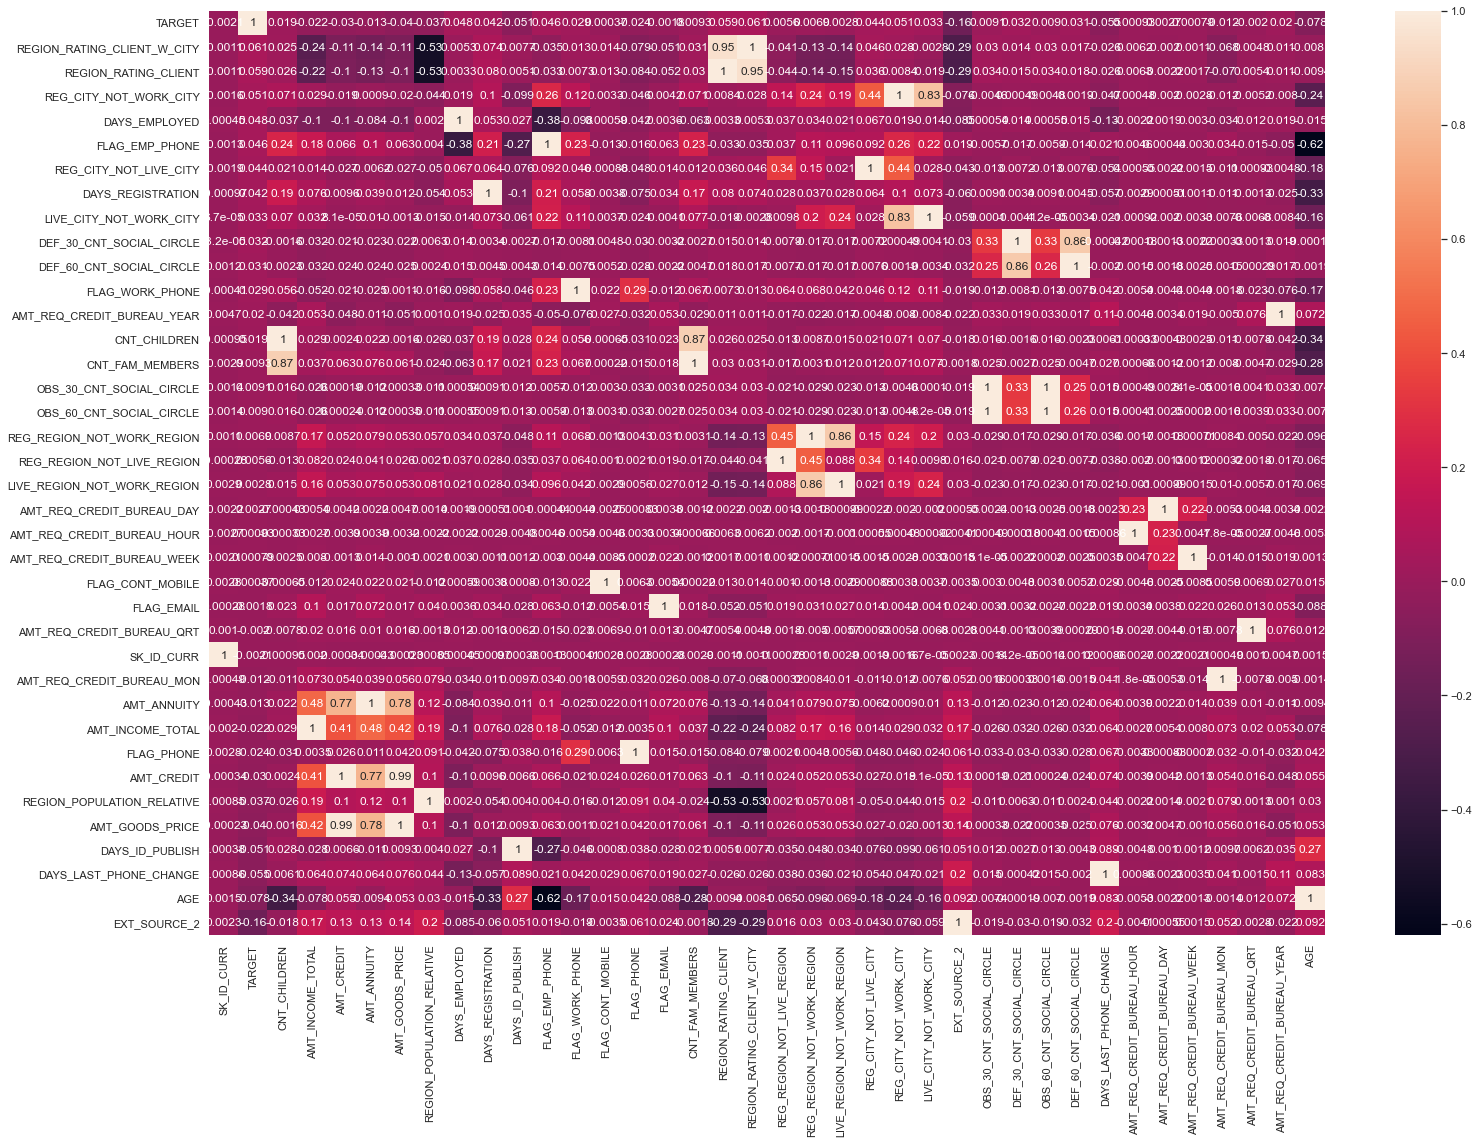

In [111]:
f, ax = plt.subplots(figsize=(25,17))
sns.heatmap(Correlation,annot=True)
plt.show()

In [112]:
Correlation.head(6)["TARGET"][1:]

REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_EMPLOYED                  0.047579
FLAG_EMP_PHONE                 0.045982
Name: TARGET, dtype: float64

In [113]:
Correlation.tail(5)["TARGET"]

AMT_GOODS_PRICE          -0.039645
DAYS_ID_PUBLISH          -0.051457
DAYS_LAST_PHONE_CHANGE   -0.055218
AGE                      -0.078263
EXT_SOURCE_2             -0.160472
Name: TARGET, dtype: float64

## Analysing Previous Application

In [115]:
#Reading previous.csv Data
prevdata = pd.read_csv("C://Users//Abhimanyu//Desktop//Banking_Data//previous_application.csv")
prevdata

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [116]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [117]:
#find the percentage of null values in each column, to identify the columns for data cleaning

(prevdata.isnull().sum() * 100 / len(prevdata)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [118]:
#method to calculate percentage of NaN values in DataFrame

def get_perc_of_missing_values(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 3)
get_perc_of_missing_values(prevdata)

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                    0.223
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT               0.536
AMT_GOODS_PRICE                0.231
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT              0.536
RATE_INTEREST_PRIMARY          0.996
RATE_INTEREST_PRIVILEGED       0.996
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE                0.491
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

In [119]:
# Iterate over columns in DataFrame and delete those with where > 40% of the values are null

for col, values in prevdata.iteritems():
    if get_perc_of_missing_values(prevdata[col]) > 0.40:
        prevdata.drop(col, axis=1, inplace=True)
prevdata

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [120]:
#find the percentage of null values in each column, to identify the columns for data cleaning

(prevdata.isnull().sum() * 100 / len(prevdata)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [121]:
prevdata.shape

(1670214, 26)

#### Checking the highest mode value for prevdata.PRODUCT_COMBINATION to replace 2% null values

In [122]:
prevdata.PRODUCT_COMBINATION.isnull().sum()/len(prevdata)*100

0.02071590826085759

In [123]:
prevdata.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [124]:
prevdata["PRODUCT_COMBINATION"].mode()[0]

'Cash'

#### Suggestion
can replace 'Cash' in place of NA values

### Visualising so as to get viable inference

In [125]:
Contract_Status = prevdata['NAME_CONTRACT_STATUS']
Contract_Status

0          Approved
1          Approved
2          Approved
3          Approved
4           Refused
             ...   
1670209    Approved
1670210    Approved
1670211    Approved
1670212    Approved
1670213    Approved
Name: NAME_CONTRACT_STATUS, Length: 1670214, dtype: object

In [126]:
#find the percentage of contract status 

prevdata_df_1=round((Contract_Status.value_counts()/prevdata["NAME_CONTRACT_STATUS"].count())*100,2)
prevdata_df_1 = pd.DataFrame(prevdata_df_1)
prevdata_df_1.reset_index(level=0, inplace=True)
prevdata_df_1.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_1.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
prevdata_df_1

,NAME_CONTRACT_STATUS,Percentage_of_Values
0,Approved,62.07
1,Canceled,18.94
2,Refused,17.40
3,Unused offer,1.58


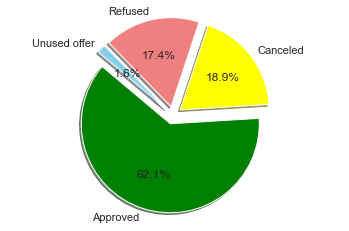

In [127]:
# Data to plot

labels = 'Approved', 'Canceled', 'Refused', 'Unused offer'
sizes = prevdata_df_1['Percentage_of_Values']
colors = ['green', 'yellow', 'lightcoral', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**62.1% people gets approved for loan**

#### Client Type

In [128]:
Client_Type = prevdata['NAME_CLIENT_TYPE']
Client_Type

0           Repeater
1           Repeater
2           Repeater
3           Repeater
4           Repeater
             ...    
1670209    Refreshed
1670210          New
1670211     Repeater
1670212     Repeater
1670213     Repeater
Name: NAME_CLIENT_TYPE, Length: 1670214, dtype: object

In [129]:
#find the percentage of contract status 

prevdata_df_2=round((Client_Type.value_counts()/prevdata["NAME_CLIENT_TYPE"].count())*100,2)
prevdata_df_2 = pd.DataFrame(prevdata_df_2)
prevdata_df_2.reset_index(level=0, inplace=True)
prevdata_df_2.rename(columns=  {"index": "NAME_CLIENT_TYPE", 
                     "NAME_CLIENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_2.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
prevdata_df_2

,NAME_CLIENT_TYPE,Percentage_of_Values
0,Repeater,73.72
1,New,18.04
2,Refreshed,8.12
3,XNA,0.12


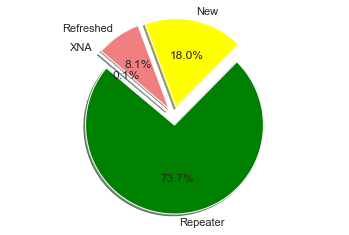

In [130]:
labels = 'Repeater', 'New', 'Refreshed', 'XNA'
sizes = prevdata_df_2['Percentage_of_Values']
colors = ['green', 'yellow', 'lightcoral', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

73.7% applicants are repeaters. Only, 18.0% are new clients.

In [131]:
Contract_Type = prevdata['NAME_CONTRACT_TYPE']
Contract_Type

0          Consumer loans
1              Cash loans
2              Cash loans
3              Cash loans
4              Cash loans
                ...      
1670209    Consumer loans
1670210    Consumer loans
1670211    Consumer loans
1670212        Cash loans
1670213        Cash loans
Name: NAME_CONTRACT_TYPE, Length: 1670214, dtype: object

In [132]:
#find the percentage of contract status 
prevdata_df_3=round((Contract_Type.value_counts()/prevdata["NAME_CONTRACT_TYPE"].count())*100,2)
prevdata_df_3 = pd.DataFrame(prevdata_df_3)
prevdata_df_3.reset_index(level=0, inplace=True)
prevdata_df_3.rename(columns=  {"index": "NAME_CONTRACT_TYPE", 
                     "NAME_CONTRACT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_3.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
prevdata_df_3

,NAME_CONTRACT_TYPE,Percentage_of_Values
0,Cash loans,44.76
1,Consumer loans,43.66
2,Revolving loans,11.57
3,XNA,0.02


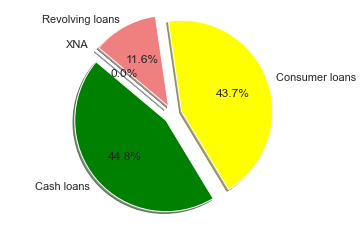

In [133]:
# Data to plot
labels = 'Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'
sizes = prevdata_df_3['Percentage_of_Values']
colors = ['green', 'yellow', 'lightcoral', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Days of approval - WEEKDAY_APPR_PROCESS_START

In [134]:
Approval_days = prevdata['WEEKDAY_APPR_PROCESS_START']
Approval_days

0           SATURDAY
1           THURSDAY
2            TUESDAY
3             MONDAY
4           THURSDAY
             ...    
1670209    WEDNESDAY
1670210      TUESDAY
1670211       MONDAY
1670212    WEDNESDAY
1670213       SUNDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 1670214, dtype: object

In [135]:
#find the percentage of contract status 
prevdata_df_4=round((Approval_days.value_counts()/prevdata["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
prevdata_df_4 = pd.DataFrame(prevdata_df_4)
prevdata_df_4.reset_index(level=0, inplace=True)
prevdata_df_4.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_4.sort_values(by = 'Percentage_of_Values' , inplace = True, ascending = False)
prevdata_df_4

,WEEKDAY_APPR_PROCESS_START,Percentage_of_Values
0,TUESDAY,15.27
1,WEDNESDAY,15.27
2,MONDAY,15.18
3,FRIDAY,15.09
4,THURSDAY,14.91
5,SATURDAY,14.41
6,SUNDAY,9.86


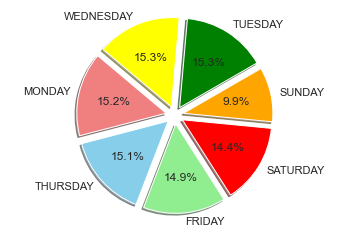

In [136]:
# Data to plot

labels = 'TUESDAY', 'WEDNESDAY', 'MONDAY', 'THURSDAY' , 'FRIDAY' , 'SATURDAY' , 'SUNDAY' 
sizes = prevdata_df_4['Percentage_of_Values']
colors = ['green', 'yellow', 'lightcoral', 'skyblue' , 'lightgreen' ,'Red','Orange']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=30)

plt.axis('equal')
plt.show()

Most of the clients have opted to apply loan on Tuesday & Wednesday. It is very interesting to see that applicants are very low on weekends. We would otherwise assume that the applicants would prefer weekends to apply.

#### Purpose of loan - NAME_CASH_LOAN_PURPOSE

In [137]:
prevdata.NAME_CASH_LOAN_PURPOSE

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [138]:
Loan_Purpose = prevdata['NAME_CASH_LOAN_PURPOSE']
Loan_Purpose

0              XAP
1              XNA
2              XNA
3              XNA
4          Repairs
            ...   
1670209        XAP
1670210        XAP
1670211        XAP
1670212        XNA
1670213        XNA
Name: NAME_CASH_LOAN_PURPOSE, Length: 1670214, dtype: object

In [139]:
#find the percentage of Loan Purpose

prevdata_df_5=round((Loan_Purpose.value_counts()/prevdata["NAME_CASH_LOAN_PURPOSE"].count())*100,2)
prevdata_df_5 = pd.DataFrame(prevdata_df_5)
prevdata_df_5.reset_index(level=0, inplace=True)
prevdata_df_5.rename(columns=  {"index": "NAME_CASH_LOAN_PURPOSE", 
                     "NAME_CASH_LOAN_PURPOSE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_5.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_5

,NAME_CASH_LOAN_PURPOSE,Percentage_of_Values
0,XAP,55.24
1,XNA,40.59
2,Repairs,1.42
3,Other,0.93
4,Urgent needs,0.50
5,Buying a used car,0.17
6,Building a house or an annex,0.16
7,Everyday expenses,0.14
8,Medicine,0.13
9,Payments on other loans,0.12


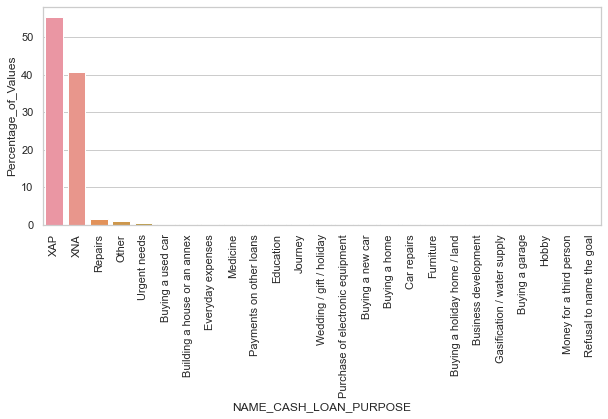

In [140]:
f, ax = plt.subplots(figsize=(10,4))
plot_2=sns.barplot("NAME_CASH_LOAN_PURPOSE","Percentage_of_Values",data=prevdata_df_5)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

***Most Loan purpose was not recorded. XAP and XNA values are highest.***

#### Payment type - NAME_PAYMENT_TYPE

In [141]:
#find the percentage of Payment Type

Payment_Type = prevdata['NAME_PAYMENT_TYPE']
prevdata_df_6=round((Payment_Type.value_counts()/prevdata["NAME_PAYMENT_TYPE"].count())*100,2)
prevdata_df_6 = pd.DataFrame(prevdata_df_6)
prevdata_df_6.reset_index(level=0, inplace=True)
prevdata_df_6.rename(columns=  {"index": "NAME_PAYMENT_TYPE", 
                     "NAME_PAYMENT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_6.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_6

,NAME_PAYMENT_TYPE,Percentage_of_Values
0,Cash through the bank,61.88
1,XNA,37.56
2,Non-cash from your account,0.49
3,Cashless from the account of the employer,0.06


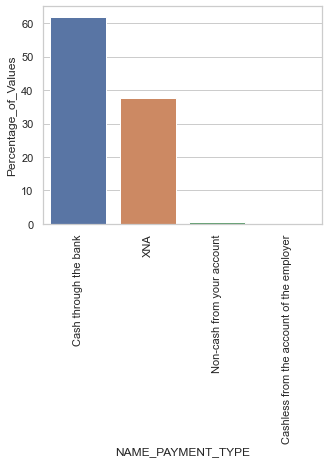

In [142]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_PAYMENT_TYPE","Percentage_of_Values",data=prevdata_df_6)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

#### Most people preferred CASH(62.44%) as the mode of Payment

#### Reason of rejection of loan - CODE_REJECT_REASON

In [143]:
#find the percentage of Payment Type

Code_Rejection = prevdata['CODE_REJECT_REASON']
prevdata_df_7=round((Code_Rejection.value_counts()/prevdata["CODE_REJECT_REASON"].count())*100,2)
prevdata_df_7 = pd.DataFrame(prevdata_df_7)
prevdata_df_7.reset_index(level=0, inplace=True)
prevdata_df_7.rename(columns=  {"index": "CODE_REJECT_REASON", 
                     "CODE_REJECT_REASON":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_7.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_7

,CODE_REJECT_REASON,Percentage_of_Values
0,XAP,81.01
1,HC,10.49
2,LIMIT,3.33
3,SCO,2.24
4,CLIENT,1.58
5,SCOFR,0.77
6,XNA,0.31
7,VERIF,0.21
8,SYSTEM,0.04


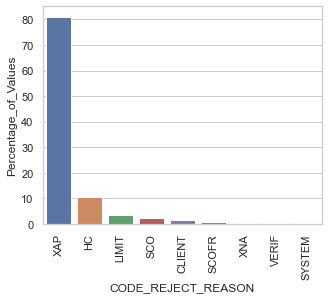

In [144]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CODE_REJECT_REASON","Percentage_of_Values",data=prevdata_df_7)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

**Primary reason for the Loan to get rejected is not recorded(XAP (81%)) followed by HC**

#### What kind of goods did the client apply for in the previous application - NAME_GOODS_CATEGORY

In [145]:
#find the percentage of Goods Client applied for
Goods_Category= prevdata['NAME_GOODS_CATEGORY']
prevdata_df_8=round((Goods_Category.value_counts()/prevdata["NAME_GOODS_CATEGORY"].count())*100,2)
prevdata_df_8 = pd.DataFrame(prevdata_df_8)
prevdata_df_8.reset_index(level=0, inplace=True)
prevdata_df_8.rename(columns=  {"index": "NAME_GOODS_CATEGORY", 
                     "NAME_GOODS_CATEGORY":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_8.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_8

,NAME_GOODS_CATEGORY,Percentage_of_Values
0,XNA,56.93
1,Mobile,13.45
2,Consumer Electronics,7.28
3,Computers,6.33
4,Audio/Video,5.95
5,Furniture,3.21
6,Photo / Cinema Equipment,1.50
7,Construction Materials,1.50
8,Clothing and Accessories,1.41
9,Auto Accessories,0.44


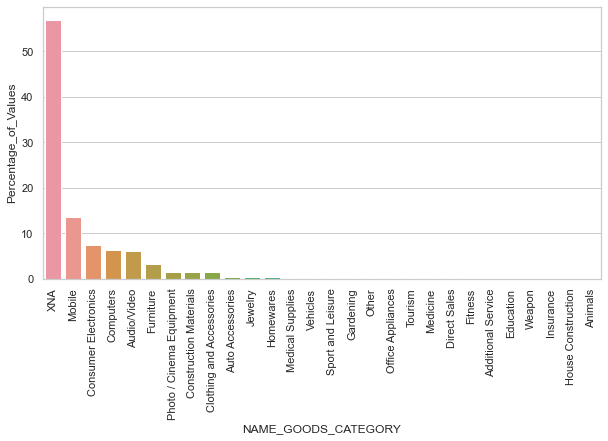

In [146]:
f, ax = plt.subplots(figsize=(10,5))
plot_2=sns.barplot("NAME_GOODS_CATEGORY","Percentage_of_Values",data=prevdata_df_8)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

Most clients applied for Mobile and 53.96% of the data is not recorded(XNA).

In [147]:
#find the percentage of Portfolio
Portfolio= prevdata['NAME_PORTFOLIO']
prevdata_df_9=round((Portfolio.value_counts()/prevdata["NAME_PORTFOLIO"].count())*100,2)
prevdata_df_9 = pd.DataFrame(prevdata_df_9)
prevdata_df_9.reset_index(level=0, inplace=True)
prevdata_df_9.rename(columns=  {"index": "NAME_PORTFOLIO", 
                     "NAME_PORTFOLIO":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_9.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_9

,NAME_PORTFOLIO,Percentage_of_Values
0,POS,41.37
1,Cash,27.63
2,XNA,22.29
3,Cards,8.68
4,Cars,0.03


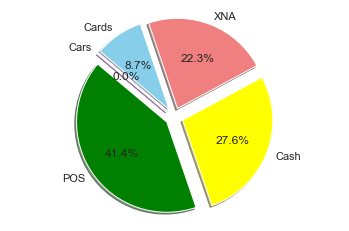

In [148]:
# Data to plot
labels = prevdata_df_9.NAME_PORTFOLIO
sizes = prevdata_df_9.Percentage_of_Values
colors = ['green', 'yellow', 'lightcoral', 'skyblue','Fuchsia']
explode = (0.1, 0.1, 0.1, 0.1,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

41.4% of the applications were for POS.

#### Was the previous application x-sell or walk-in - NAME_PRODUCT_TYPE

In [149]:
#find the percentage of Product Type 

Product_Type= prevdata['NAME_PRODUCT_TYPE']
prevdata_df_10=round((Product_Type.value_counts()/prevdata["NAME_PRODUCT_TYPE"].count())*100,2)
prevdata_df_10 = pd.DataFrame(prevdata_df_10)
prevdata_df_10.reset_index(level=0, inplace=True)
prevdata_df_10.rename(columns=  {"index": "NAME_PRODUCT_TYPE", 
                     "NAME_PRODUCT_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_10.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_10

,NAME_PRODUCT_TYPE,Percentage_of_Values
0,XNA,63.68
1,x-sell,27.32
2,walk-in,9.00


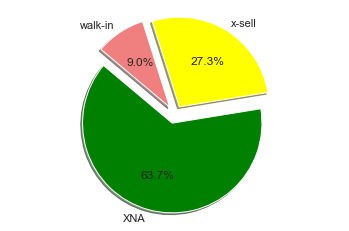

In [150]:
# Data to plot

labels = prevdata_df_10.NAME_PRODUCT_TYPE
sizes = prevdata_df_10.Percentage_of_Values
colors = ['green', 'yellow', 'lightcoral']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

X-sell applications were more than walk-in

#### Through which channel we acquired the client on the previous application - CHANNEL_TYPE

In [151]:
#find the percentage of Channels via which client applied loan

Channel_Type= prevdata['CHANNEL_TYPE']
prevdata_df_11=round((Channel_Type.value_counts()/prevdata["CHANNEL_TYPE"].count())*100,2)
prevdata_df_11 = pd.DataFrame(prevdata_df_11)
prevdata_df_11.reset_index(level=0, inplace=True)
prevdata_df_11.rename(columns=  {"index": "CHANNEL_TYPE", 
                     "CHANNEL_TYPE":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_11.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_11

,CHANNEL_TYPE,Percentage_of_Values
0,Credit and cash offices,43.11
1,Country-wide,29.62
2,Stone,12.70
3,Regional / Local,6.50
4,Contact center,4.27
5,AP+ (Cash loan),3.42
6,Channel of corporate sales,0.37
7,Car dealer,0.03


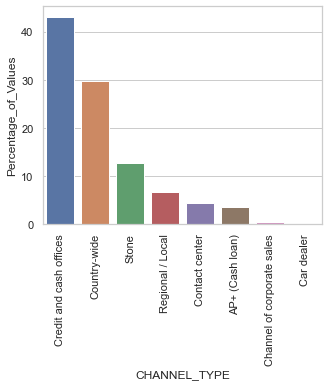

In [152]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("CHANNEL_TYPE","Percentage_of_Values",data=prevdata_df_11)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

Most clients were from Credit and Cash Offices

#### The industry of the seller - NAME_SELLER_INDUSTRY

In [153]:
#find the percentage of Goods Client applied

Seller_Industry= prevdata['NAME_SELLER_INDUSTRY']
prevdata_df_12=round((Seller_Industry.value_counts()/prevdata["NAME_SELLER_INDUSTRY"].count())*100,2)
prevdata_df_12 = pd.DataFrame(prevdata_df_12)
prevdata_df_12.reset_index(level=0, inplace=True)
prevdata_df_12.rename(columns=  {"index": "NAME_SELLER_INDUSTRY", 
                     "NAME_SELLER_INDUSTRY":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_12.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_12

,NAME_SELLER_INDUSTRY,Percentage_of_Values
0,XNA,51.23
1,Consumer electronics,23.85
2,Connectivity,16.53
3,Furniture,3.46
4,Construction,1.78
5,Clothing,1.43
6,Industry,1.15
7,Auto technology,0.30
8,Jewelry,0.16
9,MLM partners,0.07


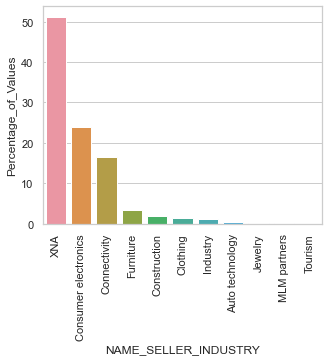

In [154]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_SELLER_INDUSTRY","Percentage_of_Values",data=prevdata_df_12)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

Most Sellers are from Consumer electronics

#### Grouped interest rate into small medium and high of the previous application - NAME_YIELD_GROUP

In [155]:
#find the percentage of Interest rate into small medium and high

Yield_Groups= prevdata['NAME_YIELD_GROUP']
prevdata_df_13=round((Yield_Groups.value_counts()/prevdata["NAME_YIELD_GROUP"].count())*100,2)
prevdata_df_13 = pd.DataFrame(prevdata_df_13)
prevdata_df_13.reset_index(level=0, inplace=True)
prevdata_df_13.rename(columns=  {"index": "NAME_YIELD_GROUP", 
                     "NAME_YIELD_GROUP":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_13.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_13

,NAME_YIELD_GROUP,Percentage_of_Values
0,XNA,30.97
1,middle,23.08
2,high,21.15
3,low_normal,19.28
4,low_action,5.51


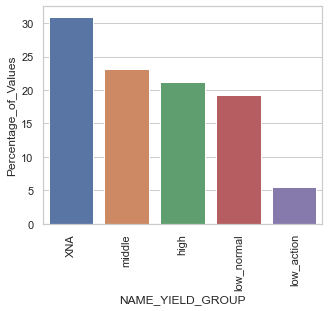

In [156]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("NAME_YIELD_GROUP","Percentage_of_Values",data=prevdata_df_13)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

Most group interest rates lie in middle.

#### Detailed product combination of the previous application - PRODUCT_COMBINATION

In [157]:
#find the percentage of Different Product Combinations

Product_Combination= prevdata['PRODUCT_COMBINATION']
prevdata_df_14=round((Product_Combination.value_counts()/prevdata["PRODUCT_COMBINATION"].count())*100,2)
prevdata_df_14 = pd.DataFrame(prevdata_df_14)
prevdata_df_14.reset_index(level=0, inplace=True)
prevdata_df_14.rename(columns=  {"index": "PRODUCT_COMBINATION", 
                     "PRODUCT_COMBINATION":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_14.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_14

,PRODUCT_COMBINATION,Percentage_of_Values
0,Cash,17.13
1,POS household with interest,15.79
2,POS mobile with interest,13.21
3,Cash X-Sell: middle,8.62
4,Cash X-Sell: low,7.80
5,Card Street,6.74
6,POS industry with interest,5.92
7,POS household without interest,4.96
8,Card X-Sell,4.83
9,Cash Street: high,3.57


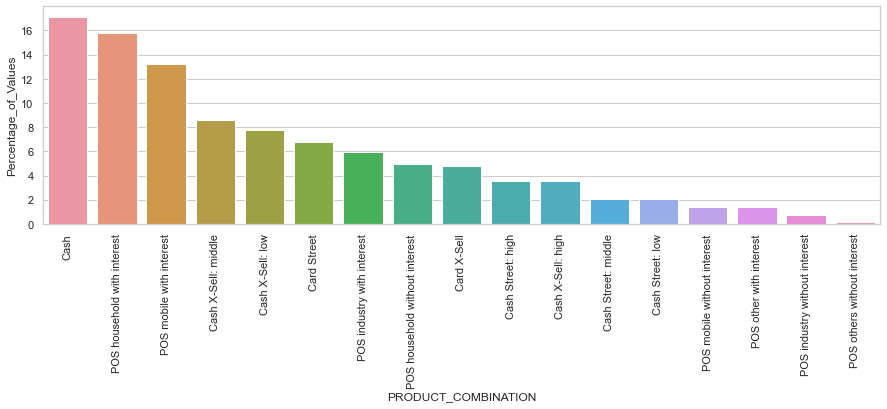

In [158]:
f, ax = plt.subplots(figsize=(15,4))
plot_2=sns.barplot("PRODUCT_COMBINATION","Percentage_of_Values",data=prevdata_df_14)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

Highest product combination is **Cash** followed by **POS household with interest**

Flag if the application was the last application per day of the client - NFLAG_LAST_APPL_IN_DAY

In [159]:
Insurance= prevdata['NFLAG_LAST_APPL_IN_DAY']
#find the percentage of Client requested Insurance
prevdata_df_15=round((Insurance.value_counts()/prevdata["NFLAG_LAST_APPL_IN_DAY"].count())*100,2)
prevdata_df_15 = pd.DataFrame(prevdata_df_15)
prevdata_df_15.reset_index(level=0, inplace=True)
prevdata_df_15.rename(columns=  {"index": "INSURANCE_FLAG", 
                     "NFLAG_LAST_APPL_IN_DAY":"Percentage_of_Values"}, 
                                 inplace = True) 
prevdata_df_15.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
prevdata_df_15

,INSURANCE_FLAG,Percentage_of_Values
0,1,99.65
1,0,0.35


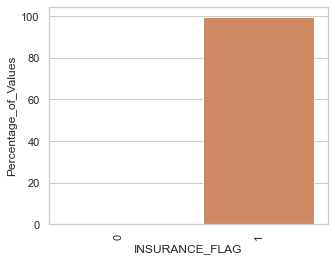

In [160]:
f, ax = plt.subplots(figsize=(5,4))
plot_2=sns.barplot("INSURANCE_FLAG","Percentage_of_Values",data=prevdata_df_15)
plot_2.set_xticklabels(plot_2.get_xticklabels(), rotation=90)
plt.show()

For most clients it was the last application of the day.

In [161]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

#### Correlation in previous_data df

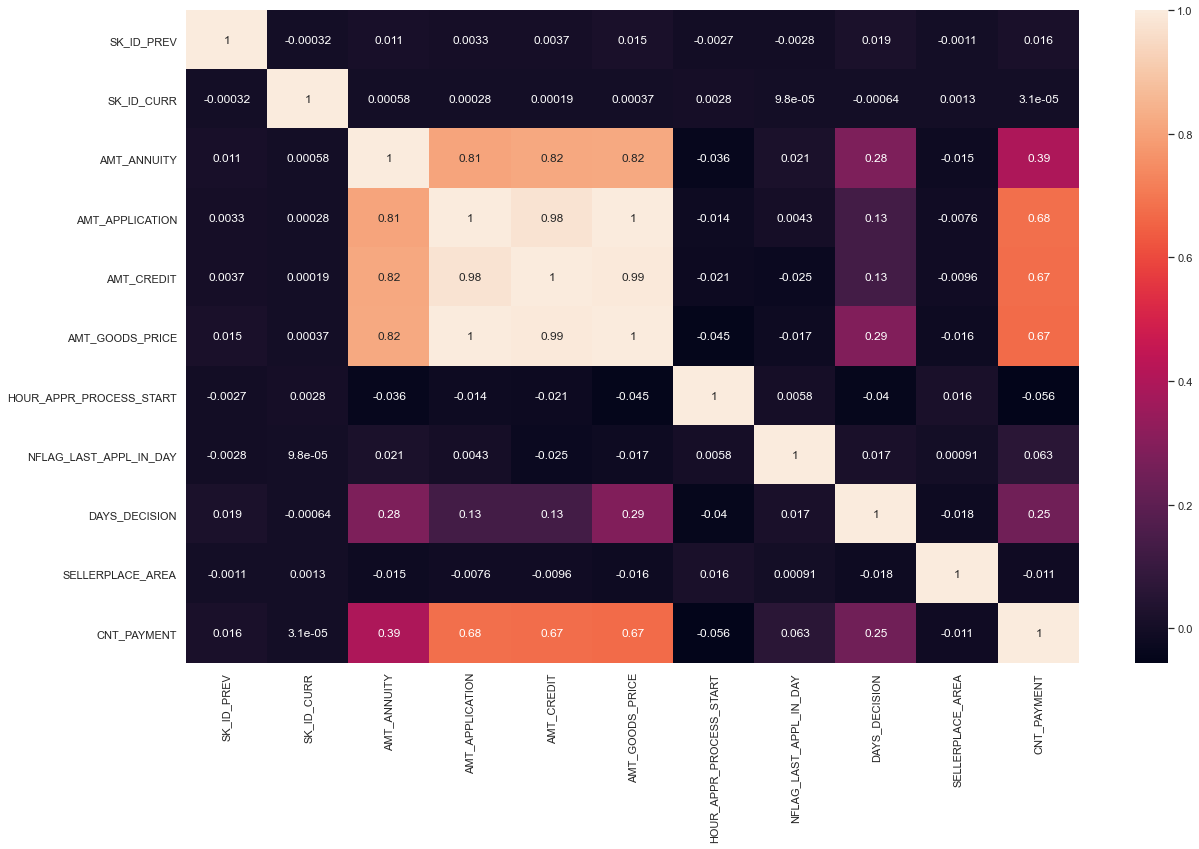

In [162]:
Correlation = prevdata.corr()
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation,annot=True)
plt.show()

Above plot shows the Correlation of variables in Previous Application Data

In [163]:
prev_current_app_df = pd.merge(prevdata,appdata,how="inner",on="SK_ID_CURR")
prev_current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 76 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_PREV                    1413701 non-null  int64  
 1   SK_ID_CURR                    1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   AMT_ANNUITY_x                 1106483 non-null  float64
 4   AMT_APPLICATION               1413701 non-null  float64
 5   AMT_CREDIT_x                  1413700 non-null  float64
 6   AMT_GOODS_PRICE_x             1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START_x  1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START       1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT   1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY        1413701 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE        1413701 non-null  object 
 12  NAME_CONTRACT_STATUS        

In [164]:
#find the percentage of null values in each column, to decide for data cleaning

(prev_current_app_df.isnull().sum() * 100 / len(prev_current_app_df)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE_x           0.00
AMT_ANNUITY_x                 21.73
AMT_APPLICATION                0.00
                              ...  
AMT_REQ_CREDIT_BUREAU_MON     11.57
AMT_REQ_CREDIT_BUREAU_QRT     11.57
AMT_REQ_CREDIT_BUREAU_YEAR    11.57
AGE                            0.00
SALARY_CATEGORY                0.00
Length: 76, dtype: float64

#### Correlation between previous_data and application_data dataframes

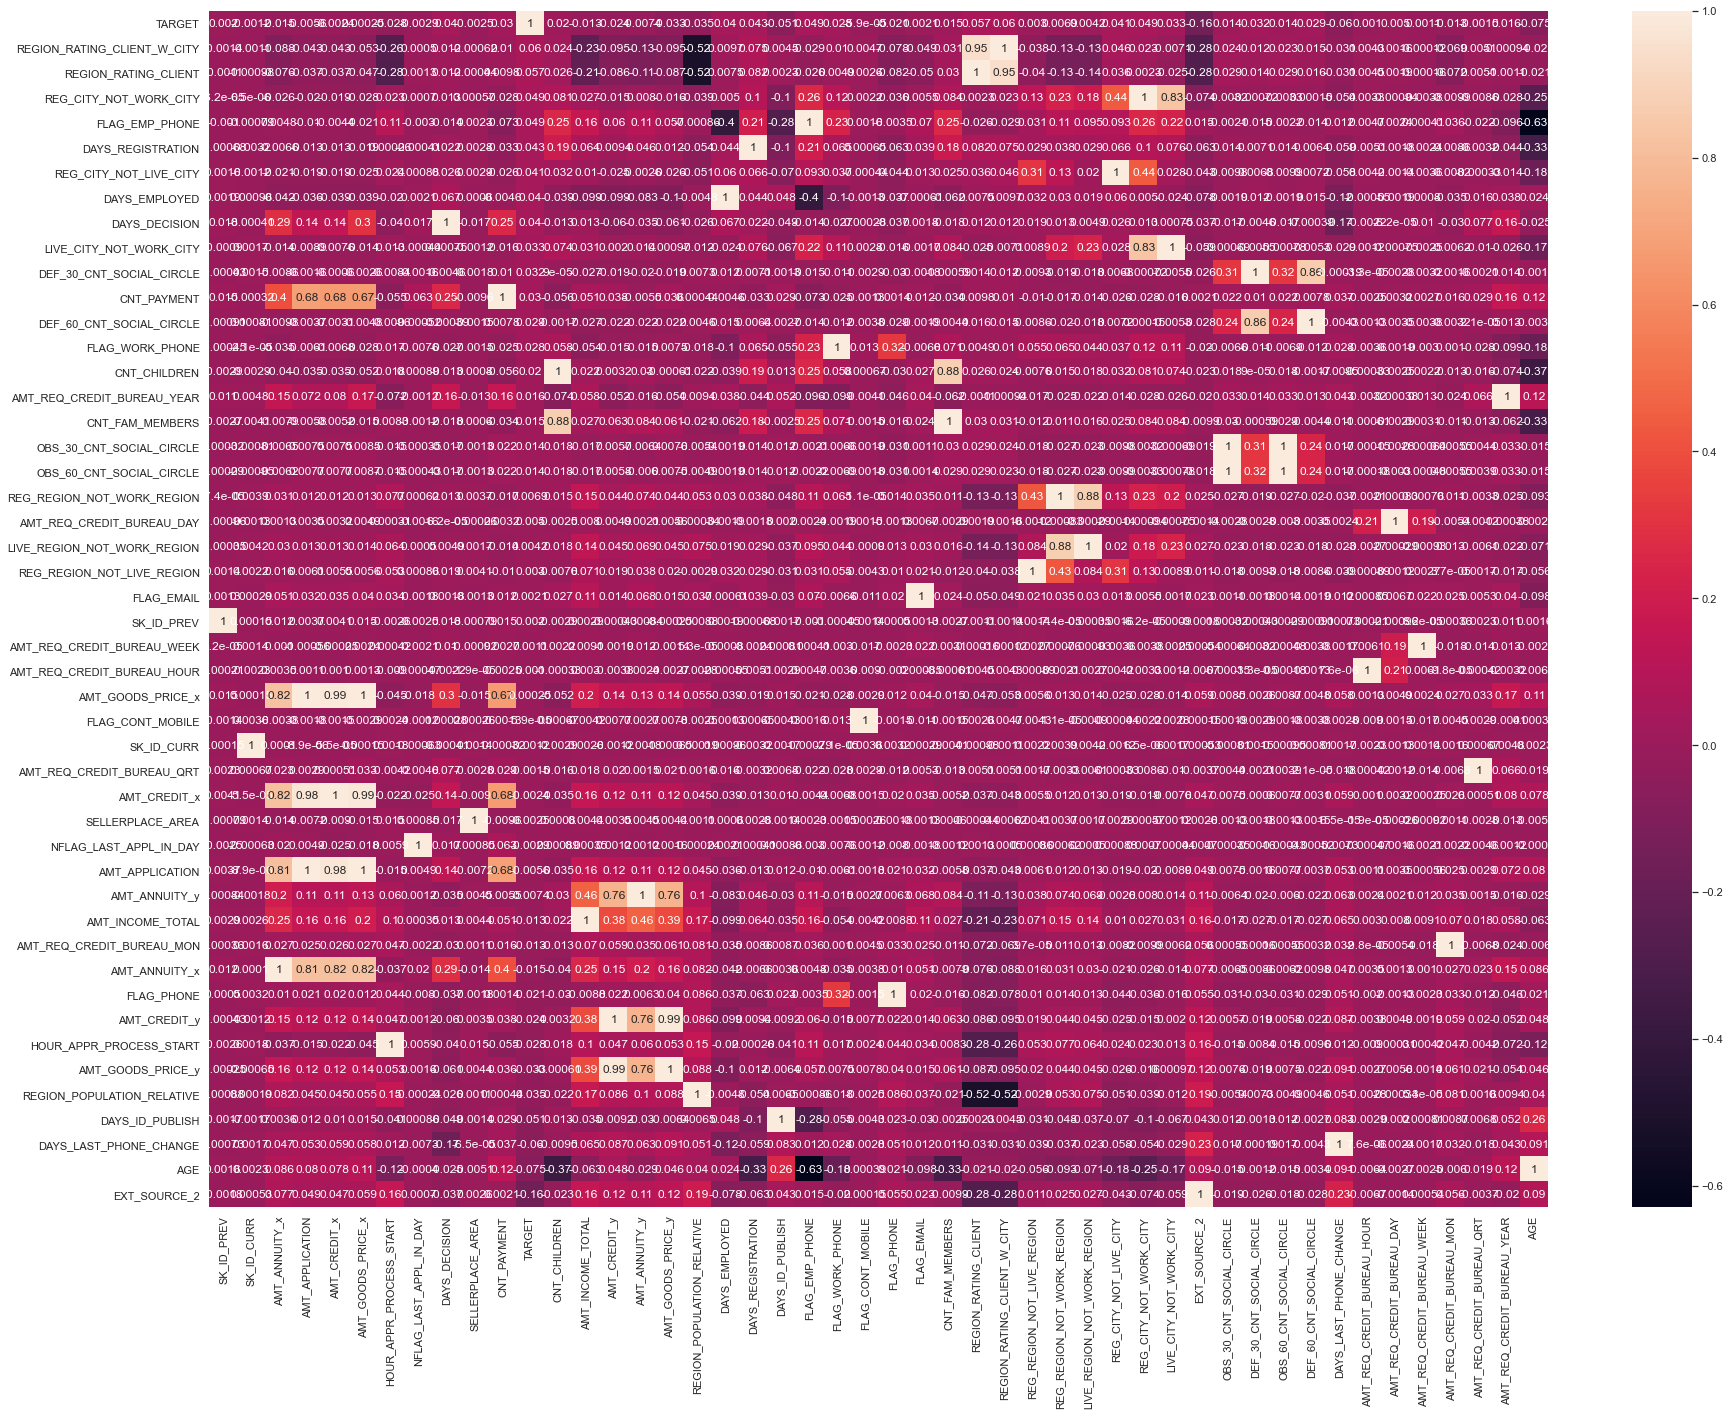

In [165]:
Correlation = prev_current_app_df.corr()
Correlation.sort_values(by=["TARGET"],ascending=False,inplace=True)
f, ax = plt.subplots(figsize=(30,22))
sns.heatmap(Correlation,annot=True)
plt.show()

In [166]:
#since its difficult to read from heatmap, taking top 6 column heads of correlation

Correlation.head(6)["TARGET"][1:]

REGION_RATING_CLIENT_W_CITY    0.059700
REGION_RATING_CLIENT           0.056932
REG_CITY_NOT_WORK_CITY         0.049353
FLAG_EMP_PHONE                 0.048750
DAYS_REGISTRATION              0.043123
Name: TARGET, dtype: float64

In [167]:
#since its difficult to read from heatmap, taking bottom 6 column heads of correlation

Correlation.tail(6)["TARGET"][1:]

REGION_POPULATION_RELATIVE   -0.035028
DAYS_ID_PUBLISH              -0.051037
DAYS_LAST_PHONE_CHANGE       -0.059721
AGE                          -0.074927
EXT_SOURCE_2                 -0.155026
Name: TARGET, dtype: float64